# Part I - Ford Go Bike Dataset Exploration

## Introduction

Ford go bike dataset is data set that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

## Preliminary Wrangling

In [1]:
# Import Libraries

# Data science
import pandas as pd
import numpy as np
import statistics
from numpy import set_printoptions
import datetime
import skimpy
from pyproj import Geod


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Plotting Pretty figures and avoiding blurry images
%config InlineBackend.figure_format = 'retina'

# Larger scale for plots in notebooks
sns.set_context('notebook')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the data
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#a copy of the csv file for testing and manipulation
dfcopy=pd.read_csv('201902-fordgobike-tripdata.csv')

I loaded the dataset into two dataframes: `df` for exploring our dataset and `dfcopy` so as to avoid making changes directly into ford_go_bike while wrangling and testing.

In [4]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 183412 │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 16     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %   ┃ mean   ┃ sd      ┃ p0    ┃ p25   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ duration_sec               │      0 │      0 │    730 │    1800 │    61 │   320 │   800 │  85000 │    █    │  │
│ │ start_station_id           │    200 │   0.11 │    140 │     110 │     3 │    47 │   240 │    400 │ █▅▂▃▂▂  │  │
│ │ start_station_latitu       │      0 │      0 │     38 │     0.1 │    37 │    38 │    38 │     38 │ ▁   █▆  │  │
│ │ start_station_longit       │      0 │      0 │   -120 │    0.12 │  -120 │  -120 │  -120 │   -120 │   █▂▁   │  │
│ │ end_station_id             │    200 │   0.11 │    140 │     110 │     3 │    44 │   240 │    400 │ █▅▂▃▂▂  │  │
│ │ end_station_latitude       │      0 │      0 │     38 │   0.099 │    37 │    38 │    38 │     38 │ ▁   █▆  │  │
│ │ end_station_longitud       │      0 │      0 │   -120 │    0.12 │  -120 │  -120 │  -120 │   -120 │   █▂▁   │  │
│ │ bike_id                    │      0 │      0 │   4500 │    1700 │    11 │  3800 │  5500 │   6600 │ ▁▁▁▁█▄  │  │
│ │ member_birth_year          │   8300 │    4.5 │   2000 │      10 │  1900 │  2000 │  2000 │   2000 │     ▃█  │  │
│ └────────────────────────────┴────────┴────────┴────────┴─────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA        ┃ NA %     ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ start_time                          │         0 │        0 │                       2 │              370000 │  │
│ │ end_time                            │         0 │        0 │                       2 │              370000 │  │
│ │ start_station_name                  │       200 │     0.11 │                       2 │              370000 │  │
│ │ end_station_name                    │       200 │     0.11 │                       2 │              370000 │  │
│ │ user_type                           │         0 │        0 │                       2 │              370000 │  │
│ │ member_gender                       │      8300 │      4.5 │                       2 │              370000 │  │
│ │ bike_share_for_all_t                │         0 │        0 │                       2 │              370000 │  │
│ └─────────────────────────────────────┴───────────┴───

- This code below shows a sample of the first 5 rows of the ford_go_bike dataset.
- This is also a programmatic assessment.
- The visual assessement was done using Google sheets

In [5]:
# Inspect the DataFrame using the shape, info, and head in pandas.

# Print the first 5 elements using .head()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,<NA>,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


We use df.info() below to see the no of rows, columns and null values in the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  string 
 2   end_time                 183412 non-null  string 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  string 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  string 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  string 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
#shape method helps with the structure of our dataset in terms of no. of rows and columns
df.shape


(183412, 16)

In [8]:
#this gives us a descriptive statistics of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


# Issues with data types
- duration_sec should be time data type
- start_time should be date type
- end_time should be data type
- start time contains 11 duplicates


# What is the structure of your dataset?
The Ford go bike data is structured with 183412 rows and 16 columns/features namely:

- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip


# What is/are the main feature(s) of interest in your dataset?
- What day of the week do they take most trips?
- How long does the higest trip take?
- Does the above depend on if a user is a subscriber or customer?
- which stations have more traffic in terms of rides?

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?
This dataset does not contain many numeric variables for my analysis purpose. But since the dataset has start_time information. 

I can extract hour, day and month information from this column and do analysis for bike usage in terms of hour, day and month.

- The user_type will assist in knowing if customers or subscriber user type will contribute to most trips
- I also think start time and end time will show insight into the day of the week in whcih most trips are recorded
- The latitude and longitude will be used to get a new variable distance(km)
- The duration_sec will be used to obtain day of the week so we can determine which week day had most rides.
- The memeber birth year will likely show age bracket of those who frequent the bike system

# Data wrangling of ford_go_bike dataset
We need to perform some data wrangling to tidy our dataset to we can work with a clean data

## Observation for our data types
- duration_sec should be time data type
- start_time should be date type
- end_time should be data type
- member_birth_year should be int
- latitude and longitude for start and end date should be converted to distance in km
- start time and end time should produce a new variable day (mon,tue,wed...sun).

# Fill Missing Values

In [9]:
#fill the member birth year missing values with 0
df['member_birth_year'].fillna(value=0,inplace=True)
#fill missing gender with rather not say
df['member_gender'].fillna(value="Rather not say",inplace=True)

- We filled the member_birth_year with 0, as we cannot plot Nan values. we will use xlim[above 0] when plotting.
- The member_gender has alot of missing gender, so we filled it up with rather not say

In [10]:
#convert to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['member_birth_year']=df['member_birth_year'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  string        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  string        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

- We converted start time and end time from object type to date type
- We also converted member_birt_year from float to int type

In [11]:
#A function to remove rows with null values on start id 
def dropRowOrCol(dframe, row_col, axis=1):
    dframe.drop(row_col, axis=axis, inplace=True)

In [12]:
#drop the rows on start_station_id, start_station_name, end_station_id,end_station_name as it has null values on those columsn
#dropping start_station_id will drop all those rows. 
rwindex=df[pd.isnull(df['start_station_id'])].index
rwindex

Int64Index([   475,   1733,   3625,   4070,   5654,   6214,   8499,   8783,
             10967,  11071,
            ...
            155470, 161400, 161844, 172481, 174807, 176154, 179730, 179970,
            180106, 181201],
           dtype='int64', length=197)

In [13]:
dropRowOrCol(df,rwindex,axis=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  string        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  string        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

- Convert start time and end time to day(mon, tue,wed...sun) on a new dataframe, new_df_times.
- convert onvert start_station_latitude,start_station_longitude,end_station_latitude and end_station_longitude to distance (km)
- a new column dist is obtained for the distance in km

In [15]:
#we create a new dataframe and converted start-time and end_time to day(mon,tue,wed...sun) so we can plot a graph
new_df_times = df[['start_time','end_time']].copy()
new_df_times.head()

,start_time,end_time
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074


In [16]:
#here we convert start_time to start day and end_time to end_day
new_df_times['start_day'] = new_df_times['start_time'].dt.day_name()
new_df_times['end_day'] = new_df_times['end_time'].dt.day_name()

In [17]:
# we convert start_station_latitude,start_station_longitude,end_station_latitude and end_station_longitude
# to distance (km)

wgs84_geod = Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate 
                                #than a spherical method

#This function calculates the distance between pairs of latitude and longtitude
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
  return dist


#Add/update a column to the data frame with the distances (in metres)
df['dist'] = Distance(df['start_station_latitude'].tolist(),df['start_station_longitude'].tolist(),df['end_station_latitude'].tolist(),df['end_station_longitude'].tolist())
#convert dist from meters to km
df['dist']=df['dist']/1000


# Univariate Exploration

In this section, we investigate distributions of individual variables in our ford_go_bike dataset.

1. duration_sec

In [18]:
# Descriptive statistics
print('median:', df.duration_sec.median())
print(df.duration_sec.describe())

median: 514.0
count    183215.000000
mean        725.902017
std        1795.078654
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64


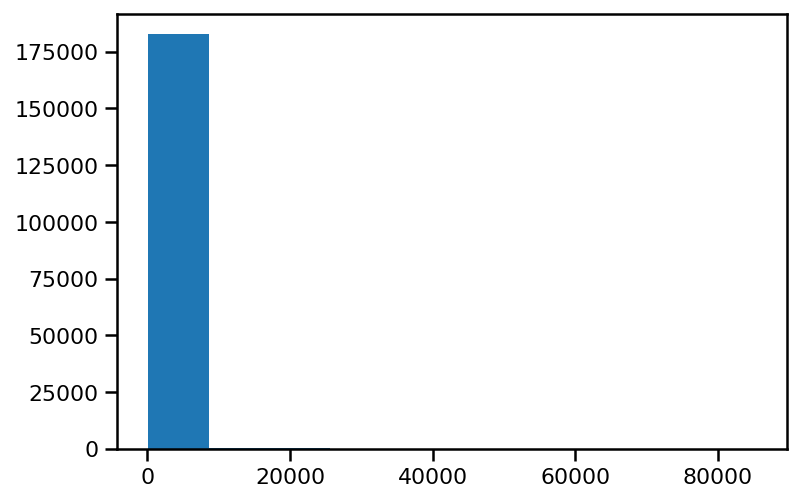

In [19]:
# Histogram
plt.hist(data = df, x = 'duration_sec');

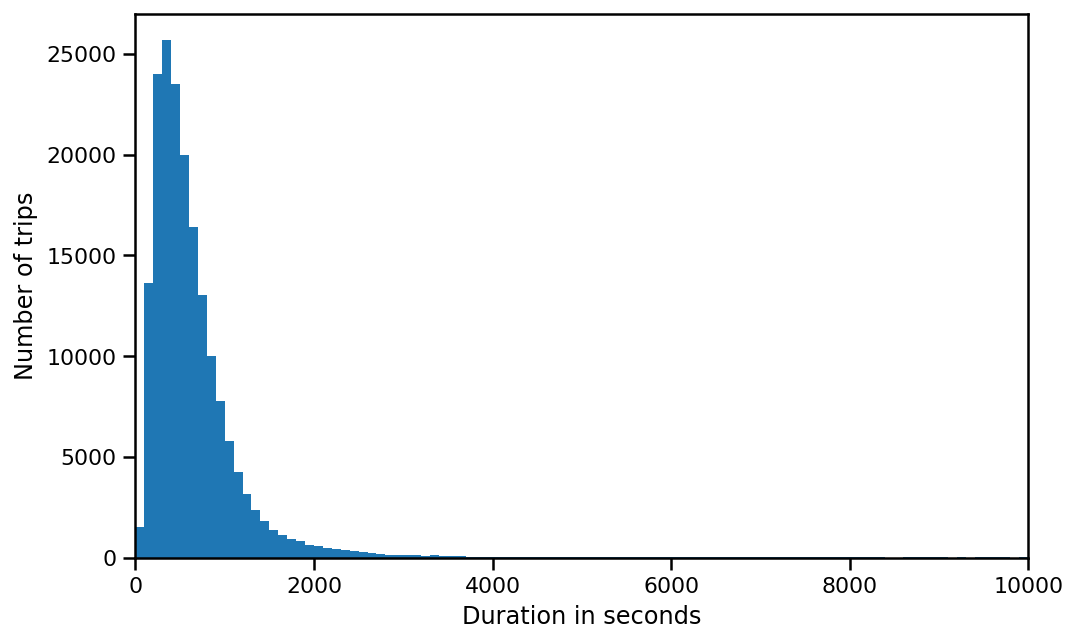

In [20]:
# Adjust the bean and set limit to x
binsize = 100
bin_edges = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bin_edges)
plt.xlabel('Duration in seconds')
plt.ylabel('Number of trips')
plt.xlim(0,10000) # set up a limit due to the outliers
plt.show()

In [21]:
# select high outliers, using criteria eyeballed from the plots
high_outliers = ((df['duration_sec'] > 6000))
print(high_outliers.sum())

907


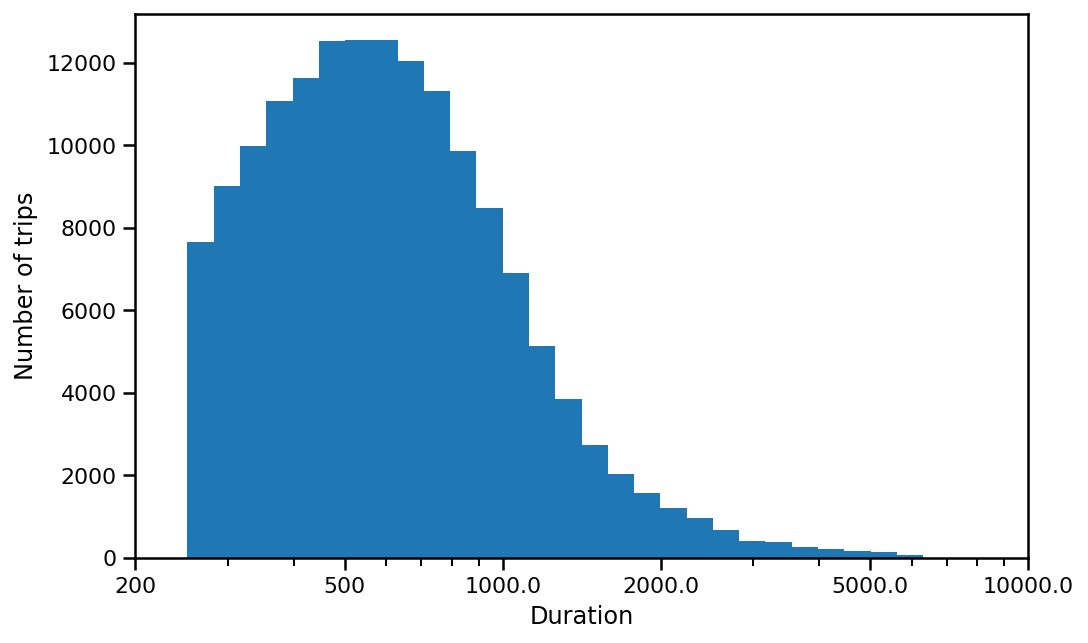

In [22]:
# There's a long-tail in the distribution, filter for duration < 6000 to remove outliers 
# and and plot on a log scale instead

duration_filter = df.query('duration_sec < 6000')
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(duration_filter['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8,5])
plt.hist(data = duration_filter, x = 'duration_sec', bins = bins)
plt.xscale('log')
tick_locs = [200, 500, 1e3, 2e3, 5e3, 1e4] #Set ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Duration')
plt.ylabel('Number of trips')
plt.show()

Observations: The first graph is not informative at all probably due to outliers. By setting up a value limit of 10000 seconds for x and plot a second graph, we can see that duration_sec has a very long-tailed distribution, with a lot of bike rides on the short duration end, and few on the long duration end. Outliers at the high end skewed the data. I filtered for duration less than 6000 seconds and plotted on a log-scale. From this graph we can see that the peak is less than 550 seconds.

Next, let's look at another variable of interest: start_time

2. start_time


I'm interested in the number of trips in terms of time of day, day of the week, and month of the year. So I need to extract those information from start_time column and create separate columns just for analysis purpose.

In [23]:
# Create month, dayofweek, hour columns for start date 
df['start_month'] = pd.DatetimeIndex(df['start_time']).month
df['start_dayofweek'] = pd.DatetimeIndex(df['start_time']).dayofweek
df['start_hour'] = pd.DatetimeIndex(df['start_time']).hour


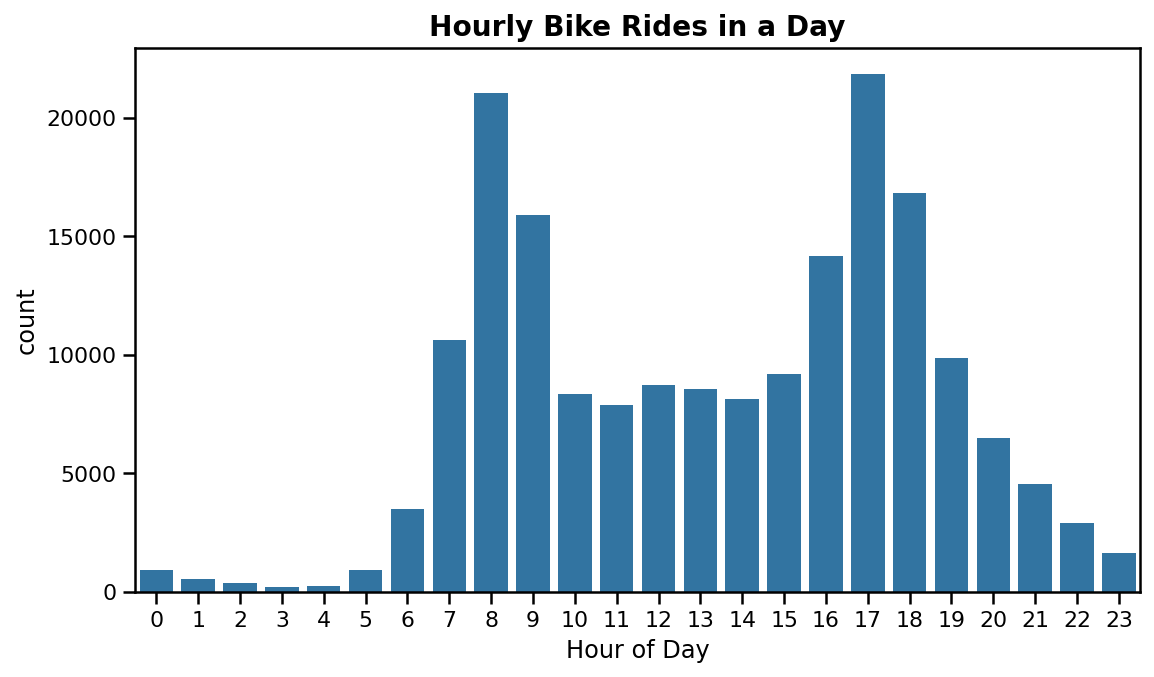

In [24]:
# number of bike trips in an hour
plt.figure(figsize=(9,5))
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='start_hour', color=base_color)
plt.title('Hourly Bike Rides in a Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day');

Obervations: The hourly distribution looks roughly bimodal, with one peak around 8am and second peak around 5pm. Daily usage rises from 4am and reaches the peak at 8am and decreases dramatically after 9am. Between 10am-2pm, bike usage around 12-1pm is slightly higher. Then from 3pm bike rent demand increases and reaches the second peak around 5pm, then it starts to decrease again. The rent service is heavily used during commute hours.

3.What day of the week has more rides?

In [25]:
new_df_times['start_day'].value_counts()

Thursday     35176
Tuesday      31781
Wednesday    29609
Friday       28962
Monday       26807
Sunday       15503
Saturday     15377
Name: start_day, dtype: int64

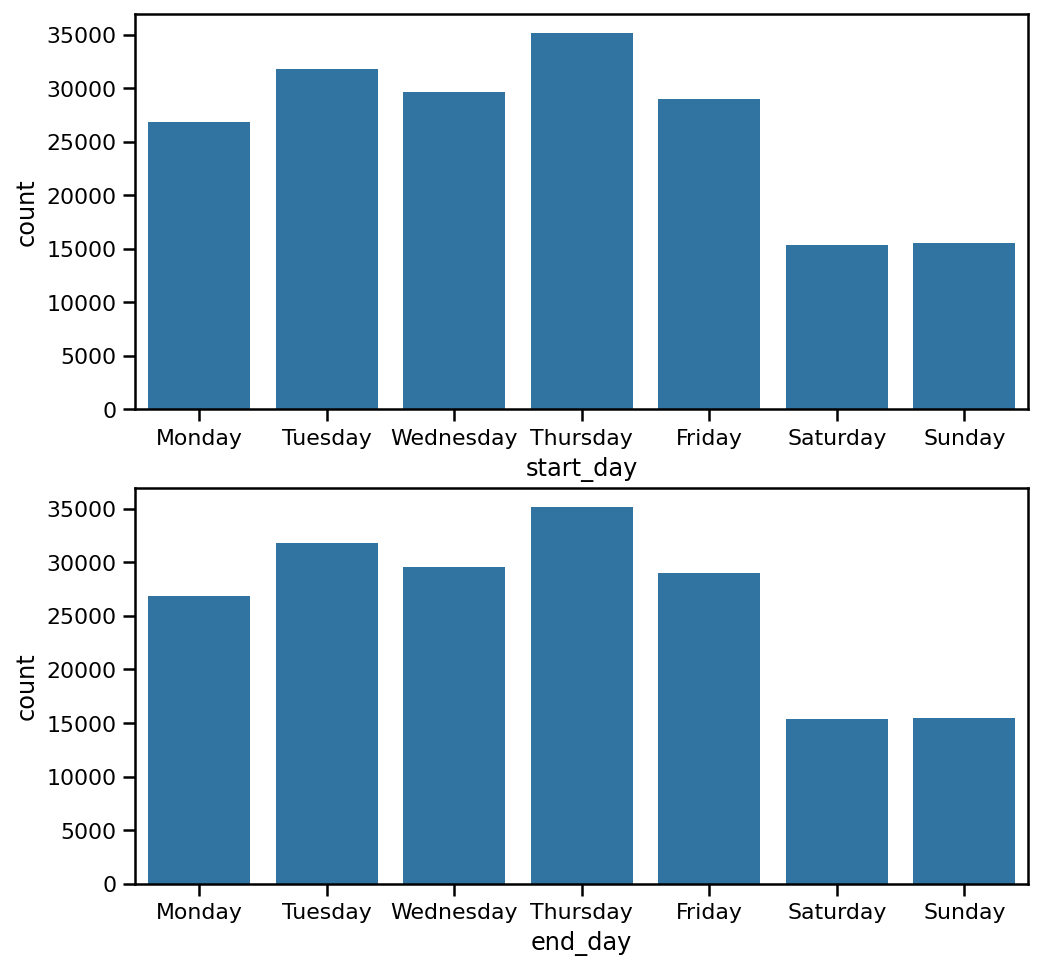

In [26]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8]);

order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

default_color = sns.color_palette()[0]
sns.countplot(data = new_df_times, x = 'start_day', color = default_color, ax = ax[0], order=order)
sns.countplot(data = new_df_times, x = 'end_day', color = default_color, ax = ax[1], order=order)



plt.show()

### Observation
- The Bar chart above shows Thursdays have more rides for both start and end colum data.
- weekends have less rides for both start and end colums


4.what is the distribution of user type (customer or subsriber) for the rides?

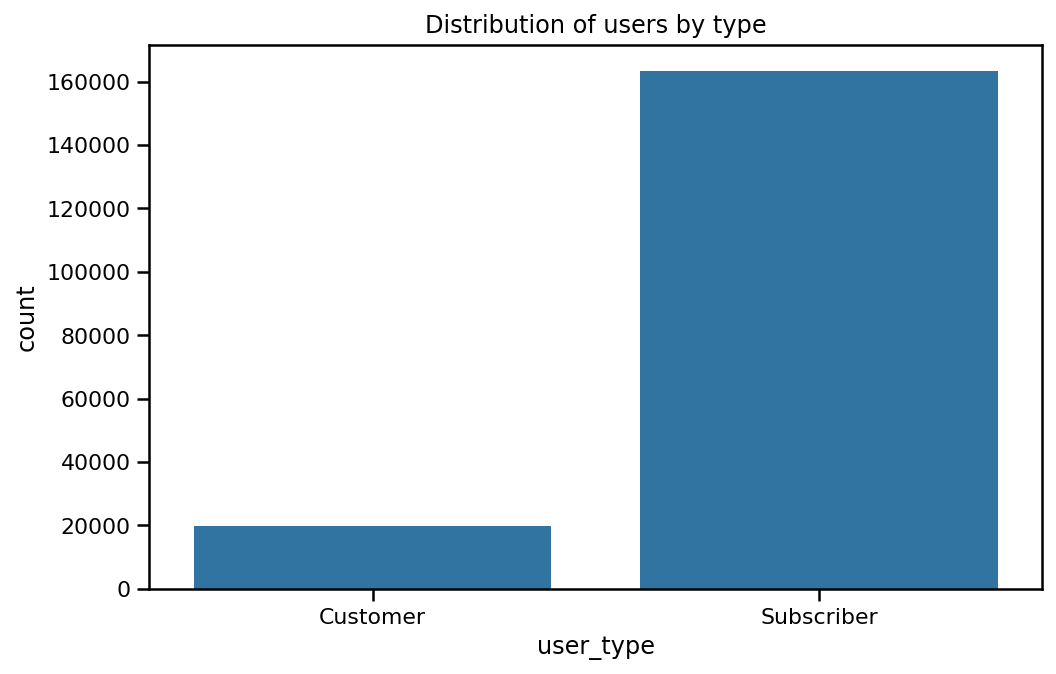

In [27]:
#since user_type is caetgorical let us plot a bar graph
plt.figure(figsize=[8, 5])
plt.title("Distribution of users by type")
color=sns.color_palette()[0]
sns.countplot(data=df, x='user_type',color=color);

### Observation

The bar graph shows visually how subscriber user type are more than customer user type

5. User Type

In [28]:
print(df.user_type.value_counts())
print()
print(df.user_type.value_counts(normalize=True))

Subscriber    163414
Customer       19801
Name: user_type, dtype: Int64

Subscriber    0.891925
Customer      0.108075
Name: user_type, dtype: Float64


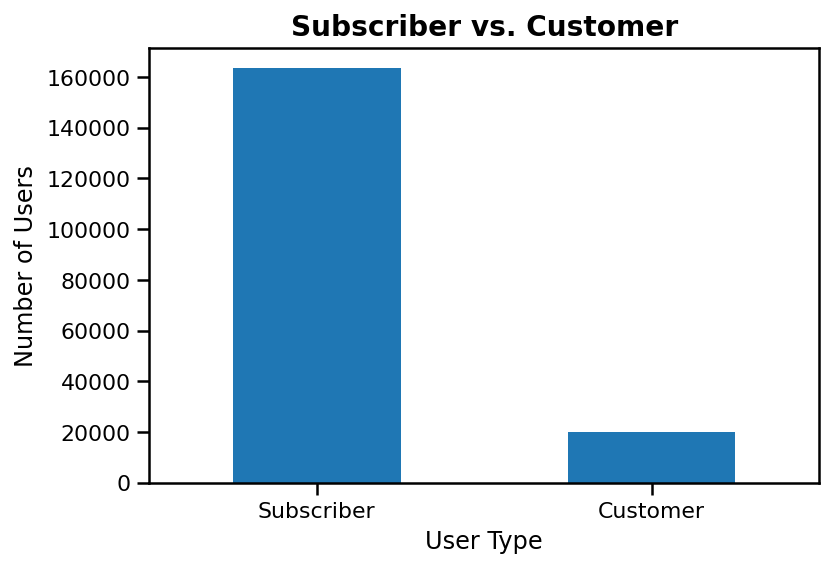

In [29]:
# Plot bar chart based on number of counts
plt.figure(figsize=[6,4])
df.user_type.value_counts().plot(kind='bar')
plt.title('Subscriber vs. Customer', fontsize=14, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0);

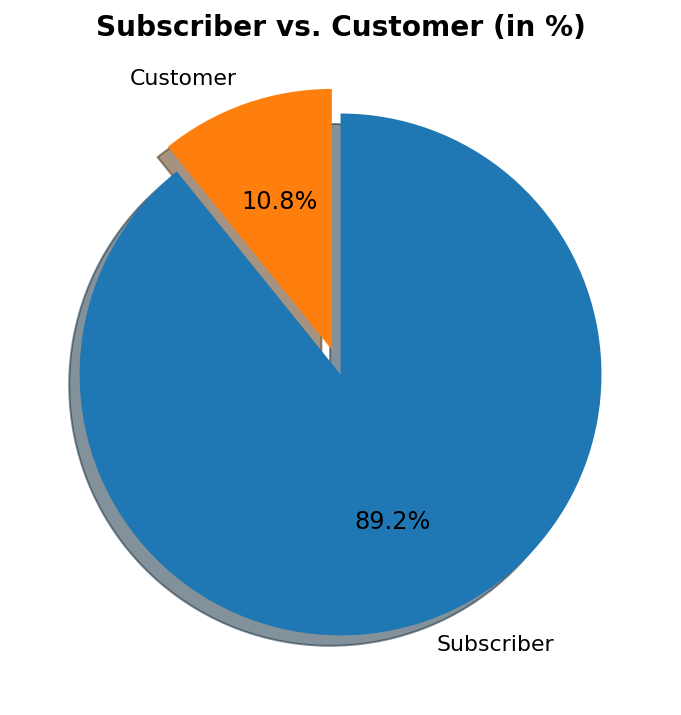

In [30]:
# Plot bar chart in %
plt.figure(figsize=[8,6])
explode = (0, 0.1) 
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, explode=explode, labels = sorted_counts.index, 
        autopct='%1.1f%%',shadow=True, startangle = 90,counterclock = False)
plt.title('Subscriber vs. Customer (in %)', fontsize=14, fontweight='bold');

Obervations: Majority of bike users are subscribers(89.2%). Customer is 10.8% for those who are not subscribers.


6. what category of gender type mostly make use of the bike sharing system?

Male              130500
Female             40805
Rather not say      8263
Other               3647
Name: member_gender, dtype: Int64


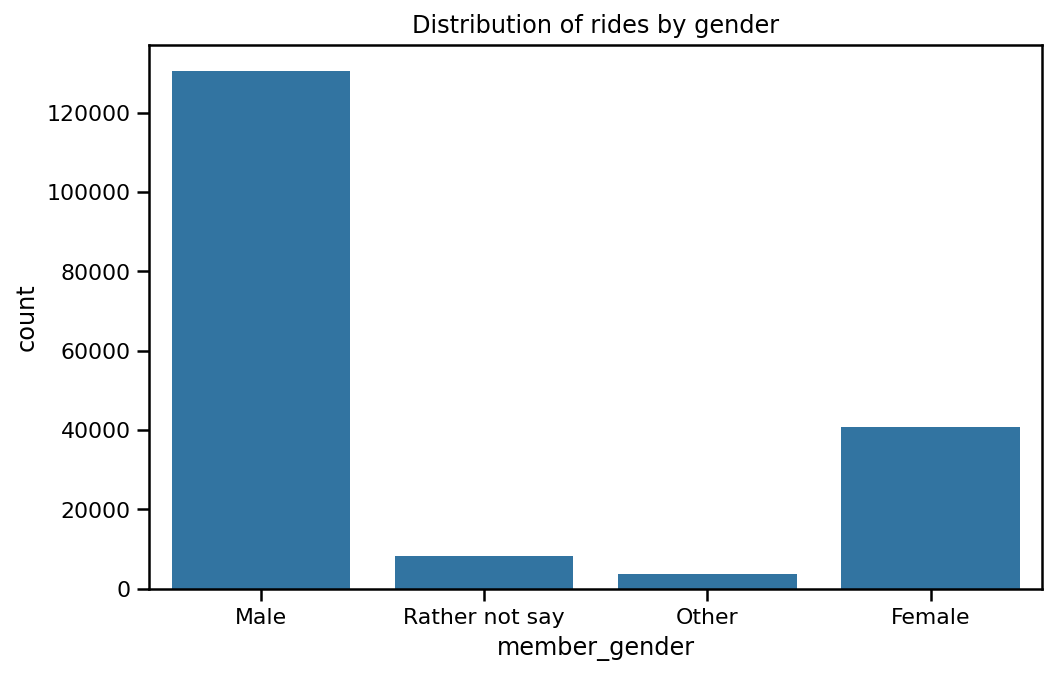

In [31]:

#we look at the gender by plotting a bar graph
#we start by looking at the user type value counts
print(df['member_gender'].value_counts())
#since it is caetgorical let us plot a bar graph
plt.figure(figsize=[8, 5])
color=sns.color_palette()[0]
plt.title("Distribution of rides by gender")
sns.countplot(data=df, x='member_gender',color=color);

Observation

- We have more males than females using the bike sharing system.
- Note that "rather not say" was used to fill genders that are not male, female or others.

#### 7. Were more bikes shared for all trip?

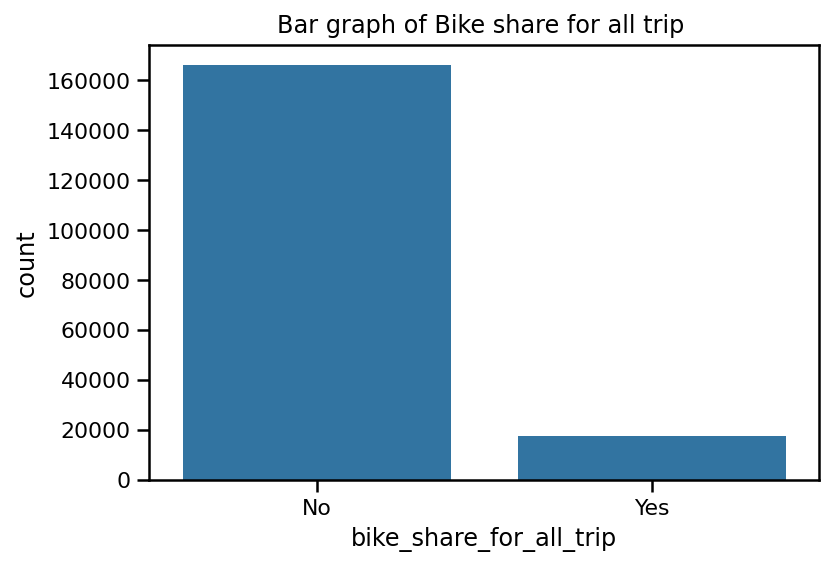

In [32]:
#bike_share_for_all_trip
df['bike_share_for_all_trip'].value_counts()
color=sns.color_palette()[0]
plt.title("Bar graph of Bike share for all trip ")
sns.countplot(data=df, x='bike_share_for_all_trip', color=color);

### Observation
Majority of users did not share their bike for all trip only a few did as shown from the visualization above

#### 8. What was the highest duration of a bike trip ?

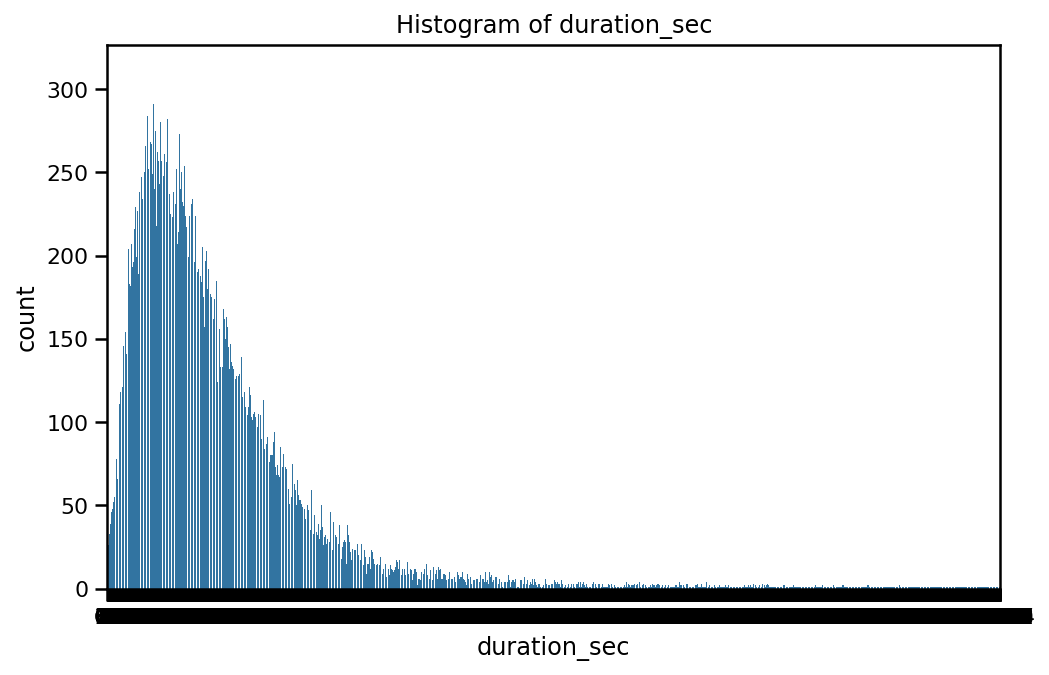

In [33]:
#let us check on the duration

plt.figure(figsize=[8, 5])
color=sns.color_palette()[0]
plt.title("Histogram of duration_sec")
sns.countplot(data=df, x='duration_sec',color=color);

### Observation
- Due to alot of data, our visualization is not clear.We can use bins and start from the minimum duration(60)
- This observation is handled in the next plot.

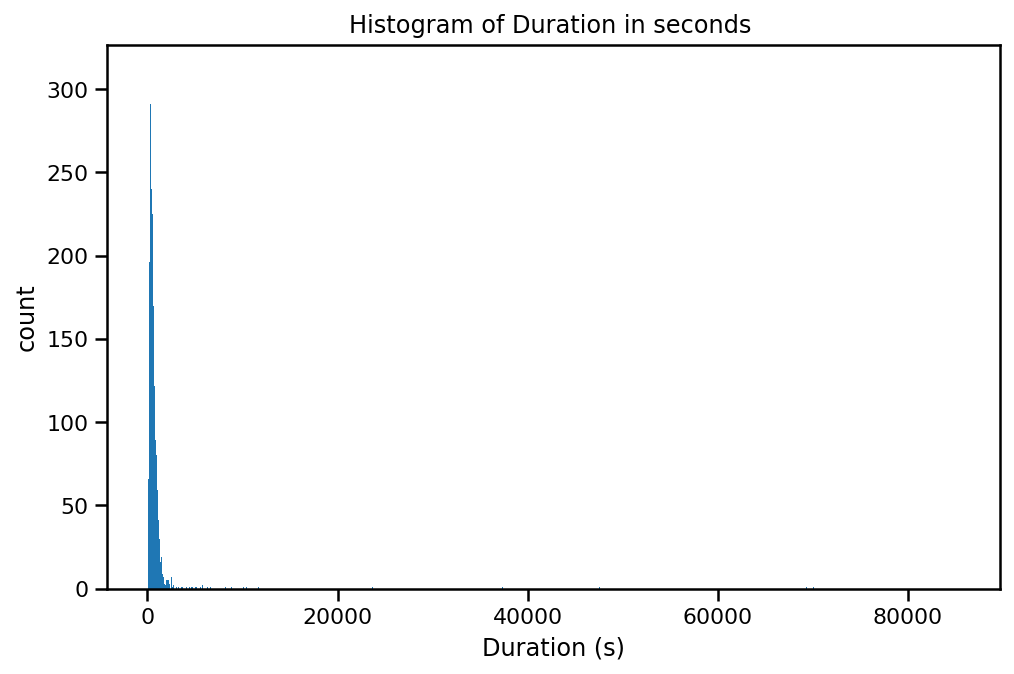

In [34]:
binsize =1
bins = np.arange(60, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title("Histogram of Duration in seconds ")
plt.xlabel('Duration (s)')
plt.ylabel('count')
plt.show()

### Observation
Outliers can still be seen , so we use xlim[0, 2000] to handle that

In [35]:
#lets convert seconds to minutes and minutes to hours
new_df_duration = df[['duration_sec']].copy()
new_df_duration['duration_sec']=new_df_duration['duration_sec']
new_df_duration['duration_min']=new_df_duration['duration_sec']/60
new_df_duration['duration_hour']=new_df_duration['duration_min']/60

new_df_duration.head()

,duration_sec,duration_min,duration_hour
0,52185,869.750000,14.495833
1,42521,708.683333,11.811389
2,61854,1030.900000,17.181667
3,36490,608.166667,10.136111
4,1585,26.416667,0.440278


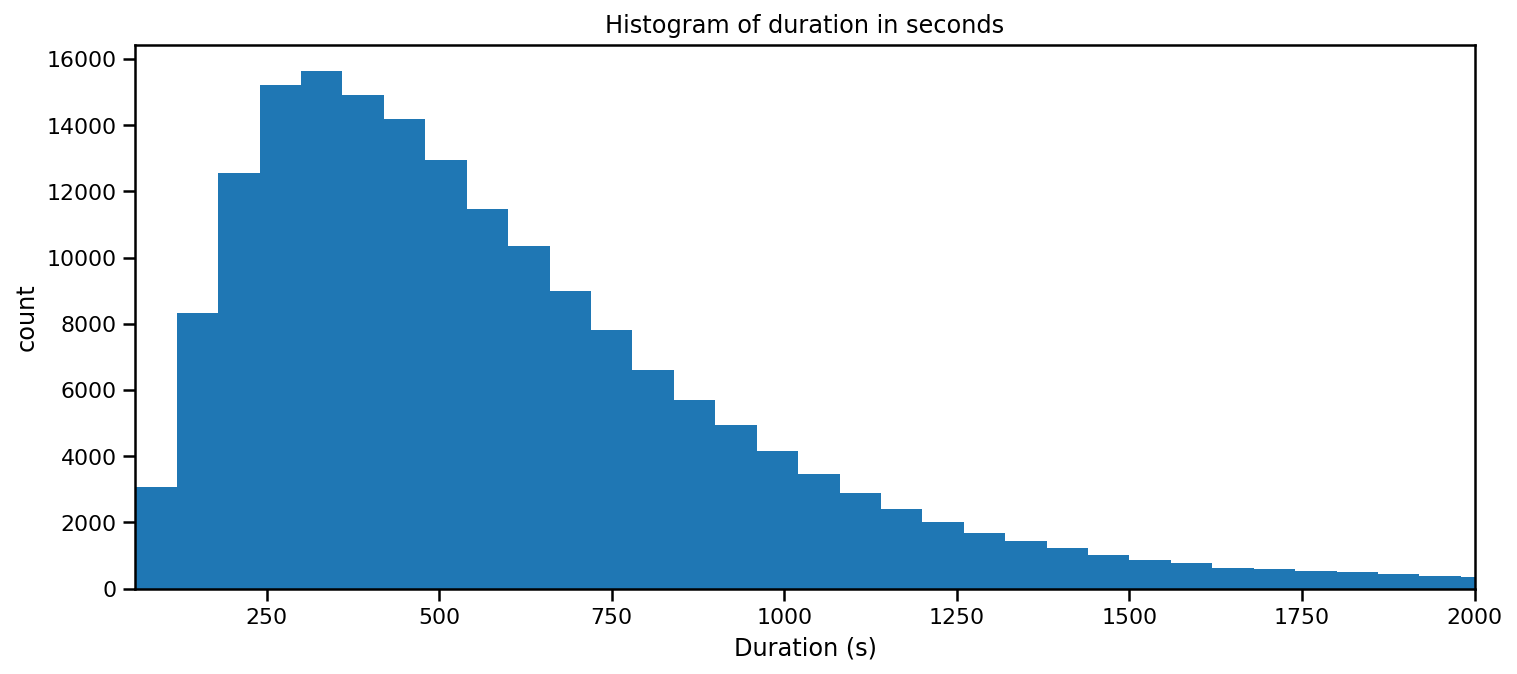

In [36]:
#using plt.xlim to handle too much data points
binsize = 60
bins = np.arange(0, new_df_duration['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = new_df_duration, x = 'duration_sec', bins = bins)
plt.xlim([60,2000])
plt.title("Histogram of duration in seconds")
plt.xlabel('Duration (s)')
plt.ylabel('count')
plt.show()


### Observation
- we have so many data points, so we convert the duration in seconds to minutes.
- The converted duration to minutes is used to further answer the same question in minutes(Question 6).

#### 9. What is the highest duration in minutes?

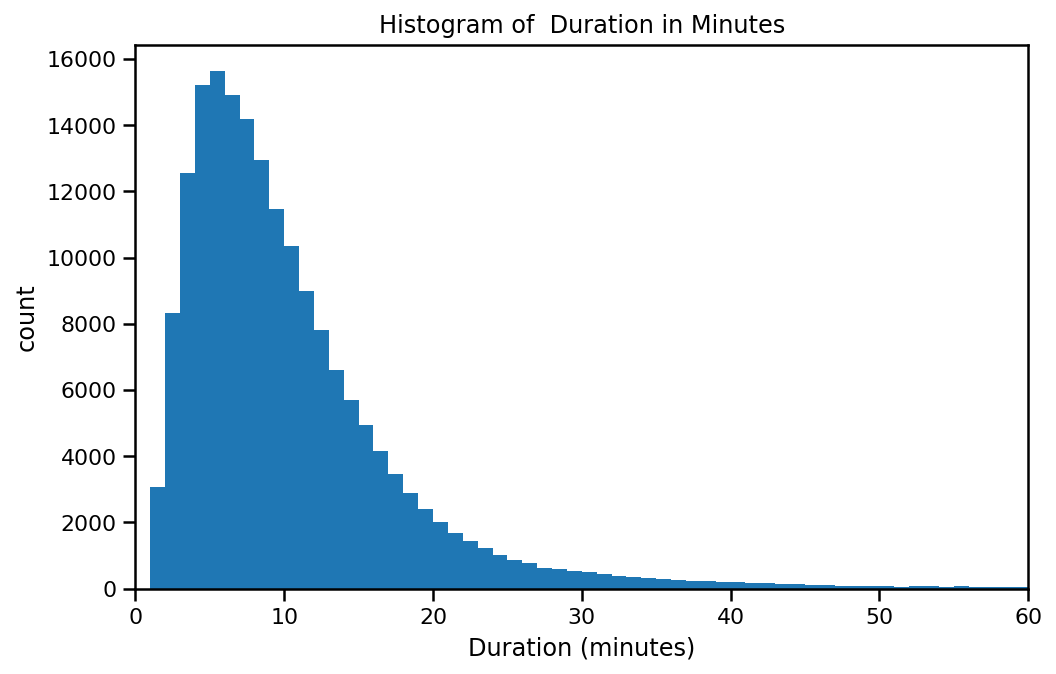

In [37]:
#converted duration from sec to min histogram
binsize = 1
bins = np.arange(0, new_df_duration['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = new_df_duration, x = 'duration_min', bins = bins)
plt.title("Histogram of  Duration in Minutes")
plt.xlim([0,60])
plt.xlabel('Duration (minutes)')
plt.ylabel('count')
plt.show()

### Observation
- The highest duration is between 5 to 7 minutes as shown on the histogram visualization

#### 10. What is the highest distance in km?

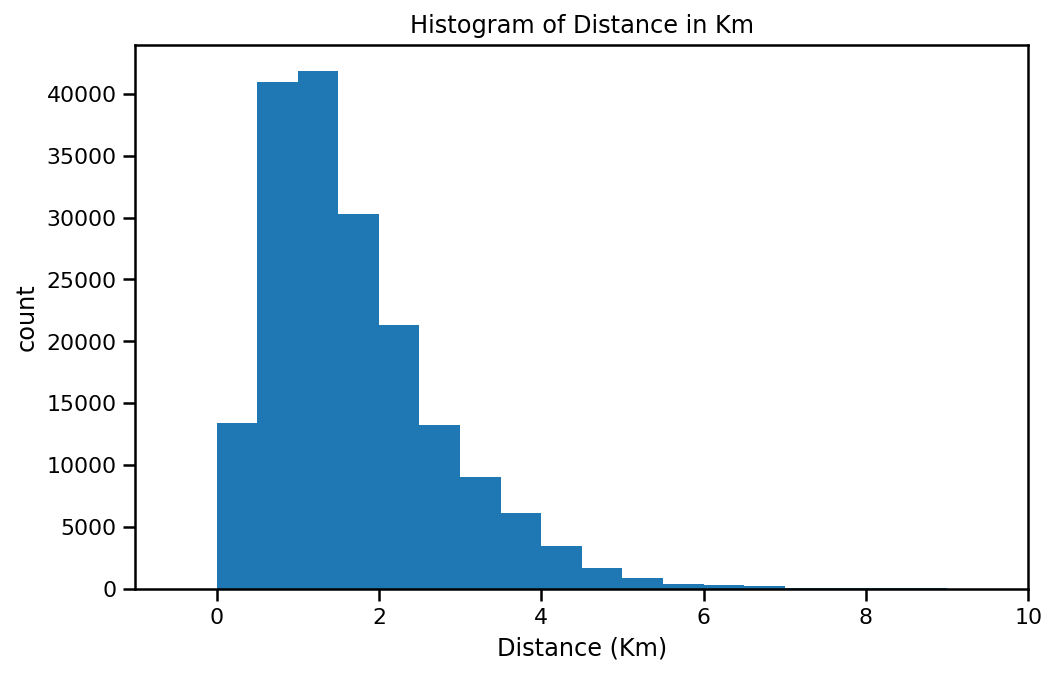

In [38]:
#converted lat and long to distance (dist) histogram for distance (km)
binsize = 0.5
bins = np.arange(0, df['dist'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'dist', bins = bins)
plt.xlim([-1,10])
plt.title("Histogram of Distance in Km")
plt.xlabel('Distance (Km)')
plt.ylabel('count')
plt.show()

### Observation
- It is observed that highest observed distance(km) lies around 1km.

#### 11. What is the distribution of member birth year from 1900 ot 2001?

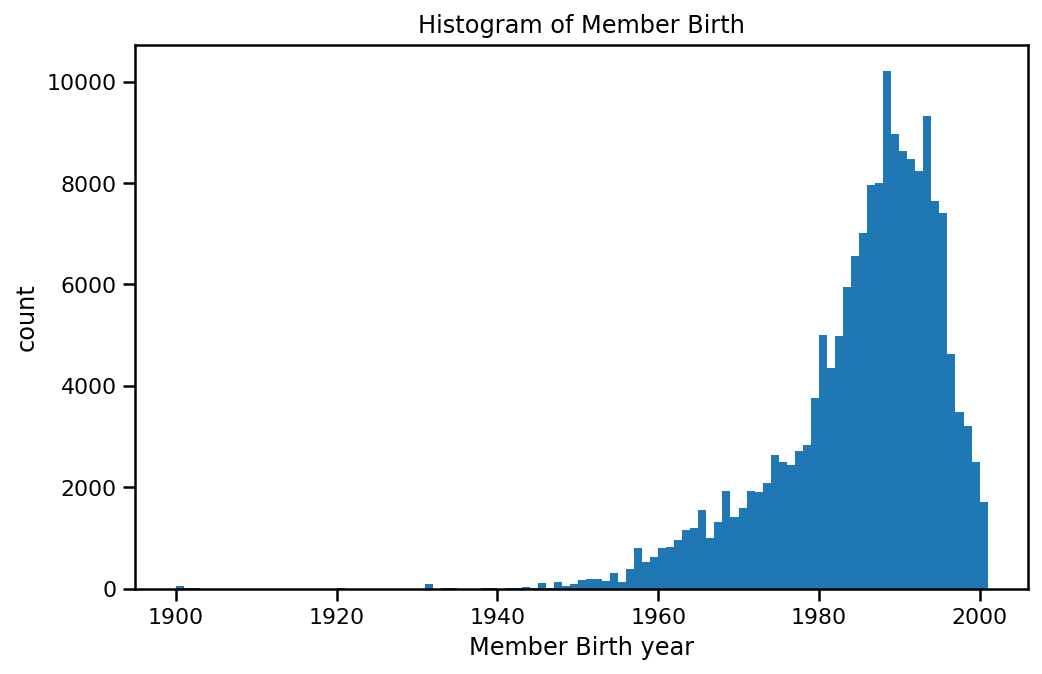

In [39]:
#member birth from 1900
binsize = 1
bins = np.arange(1900, df['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins)
#plt.xlim([0,100])
plt.title("Histogram of Member Birth")
plt.xlabel('Member Birth year')
plt.ylabel('count')
plt.show()

### Observation
- our visualization shows users age to rise from 1960 to 1985
- a drop was observed from 1985 and a rise from 1993
- we can further check from 1940 to 2001

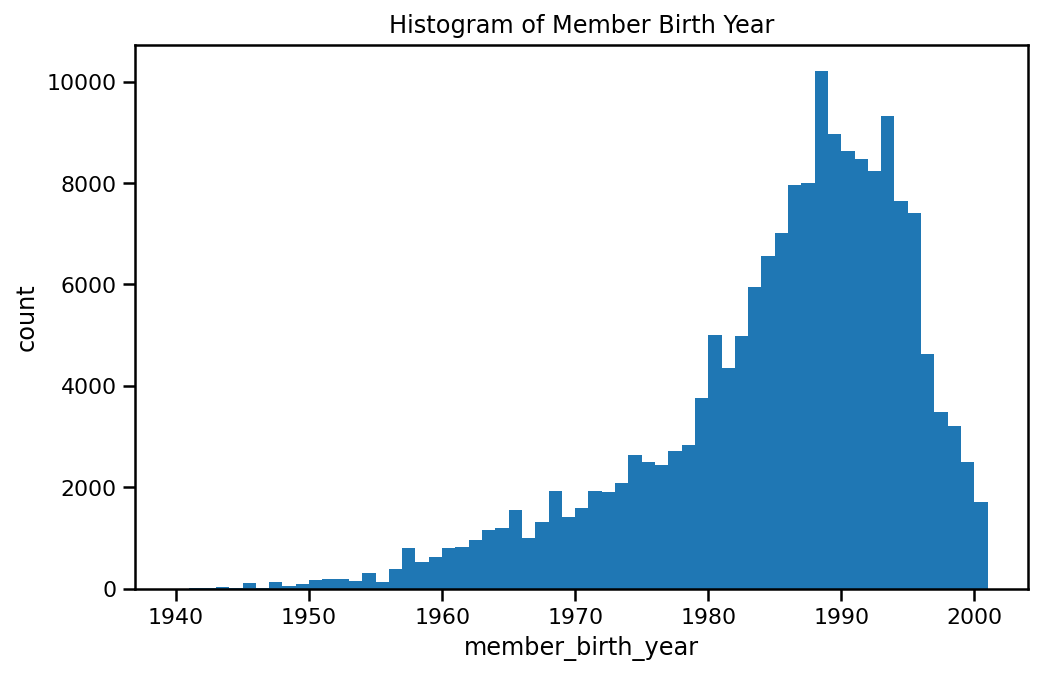

In [40]:
#member birth using 1940 as our starting xticks
binsize = 1
bins = np.arange(1940, df['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins)
#plt.xlim([0,100])
plt.title("Histogram of Member Birth Year")
plt.ylabel('count')
plt.xlabel('member_birth_year')
plt.show()

### Observation
From 1940 observation, we can see 1986 to have higher no of users

#### 12. What is the maximum speed in m/s?

In [41]:
#lets calculate speeed which is distance/ time
#dist is in km, so convert to meters, 
df['speed']=(df['dist']*1000)/df['duration_sec']

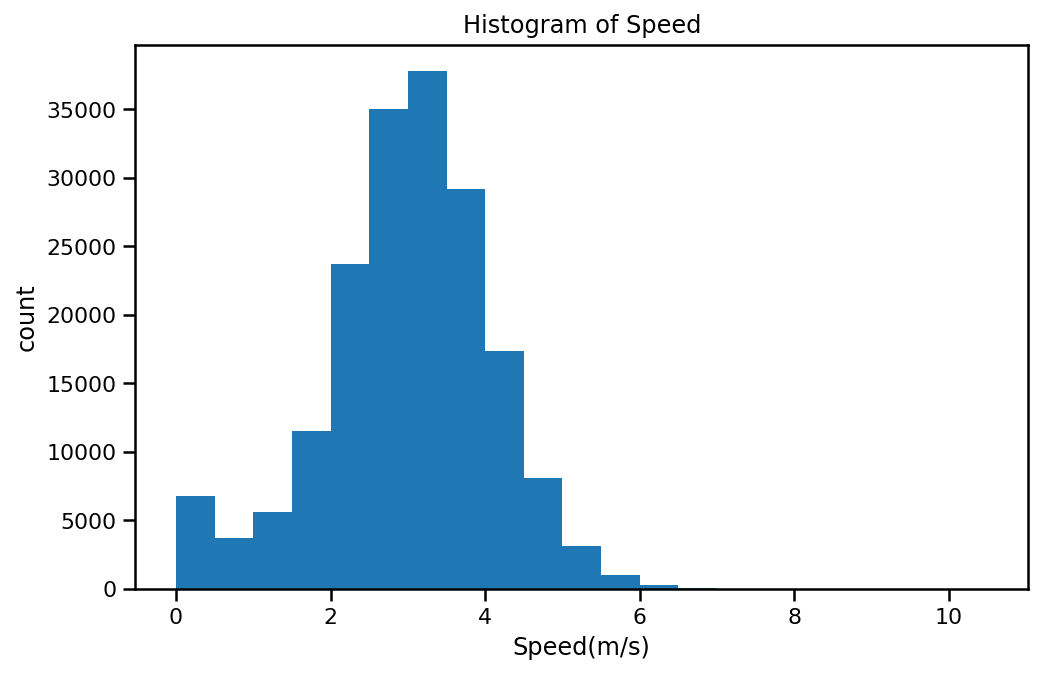

In [42]:
#speed historgram 
df['speed'].value_counts();
binsize = 0.5
bins = np.arange(0, df['speed'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'speed', bins = bins)
#plt.xlim([0,100])
plt.title("Histogram of Speed")
plt.xlabel('Speed(m/s)')
plt.ylabel('count')
plt.show()

### Observation
- speed tends to be highest around 3m/s

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


The first plot of distribution for duration is not informative at all due to outliers at the long end. By setting up a value limit, the second plot looks better. But it was still highly skewed with most bike rides on the short duration end, and few on the long duration end. I filtered duration for rides less than 6000 seconds(eyeballed from the plots) and plotted on a log-scale. From this graph we can see that the peak is a little less than 550 seconds, suggesting that most of the bike rides are around 550 seconds.

In order to find out usage pattern in terms of time of day, day of the week and month of the year, I need to plot bike usage for each of the above mentioned variables. However, those data are not provided separately. They're all part of start_time. I had to extract month, day and hour information from start_time and put into separate columns to for analysis purpose.


**start_time and end_time

A transformation was made on start_time and end_time to obtain start day and end day.The transformed variables show Thursday to have highest no of rides for both columns. Weekends had less rides, and Monday was an average day to ride.
**user_type variable

This variable had two categories,subscriber and customer. The subscriber user type are more than customer user type by a significant number.

**member_gender

A transformation was needed in that empty space existed for gender which was filled wih :rather not say". Result shows we have more males than females using the bike sharing system.

**bike_share_for_all_trip

No transformation was carried out here and by a significant amount, many did not share their bike for all trip( chosed no).

**duration_sec

Due to alot of data, our visualization is not clear, We used bins and our range on the xlimit started from 60 which was minimum duration. Outliers were observed, so we use xlim[0, 2000] to handle that. We had so many data points, so we convert the duration in seconds to minutes. The converted duration to minutes was used and The highest duration was between 5 to 7 minutes as shown on the histogram visualization.

**dist

we converted start_station_latitude,start_station_longitude,end_station_latitude and end_station_longitude to distance (km). We observed that highest distance(km) lies around 1km.

**member_birth_year

Our visualization shows users age to rise from 1960 to 1985, a drop was observed from 1985 and a rise from 1993. we did a further check from 1940 to 2001 and recorded birth year 1986 to have higher no of biker users

**speed

A transformation was made using dist/time formula to calculate speed and we observed speed tends to be highest around 3m/s

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I had to apply scale transformation to the distribution of trip duration. The data looks highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will looks more like a normal distribution.

- member_gender was filled wih :rather not say" as the rows contain empty spaces
- we perfomed a change in duration_sec by converting it into minutes as minutes is easier to report or handle. e.g he rode for 789 seconds is better expressed as he rode for 13.15 seconds.
- Distance (dist) variable was obtained from start_station_latitude,start_station_longitude,end_station_latitude and end_station_longitude. operations on the four variables resulted in a distance (km). This was because distance was not given on the original dataset.
- member_birth_year had a lot of data points and was difficult to see insights. We used range from 1960 to 1985, 1940 to 2001 and such to have a clearer view with visualizations.
- A transformation was made using dist/time formula to calculate speed because speed was not given in the original dataset.

# III. Bivariate Exploration
In this section, I'll investigate relationship between pairs of variables. Let's first check how the trip duration varies between different user types.

1. duration_sec vs. user_type

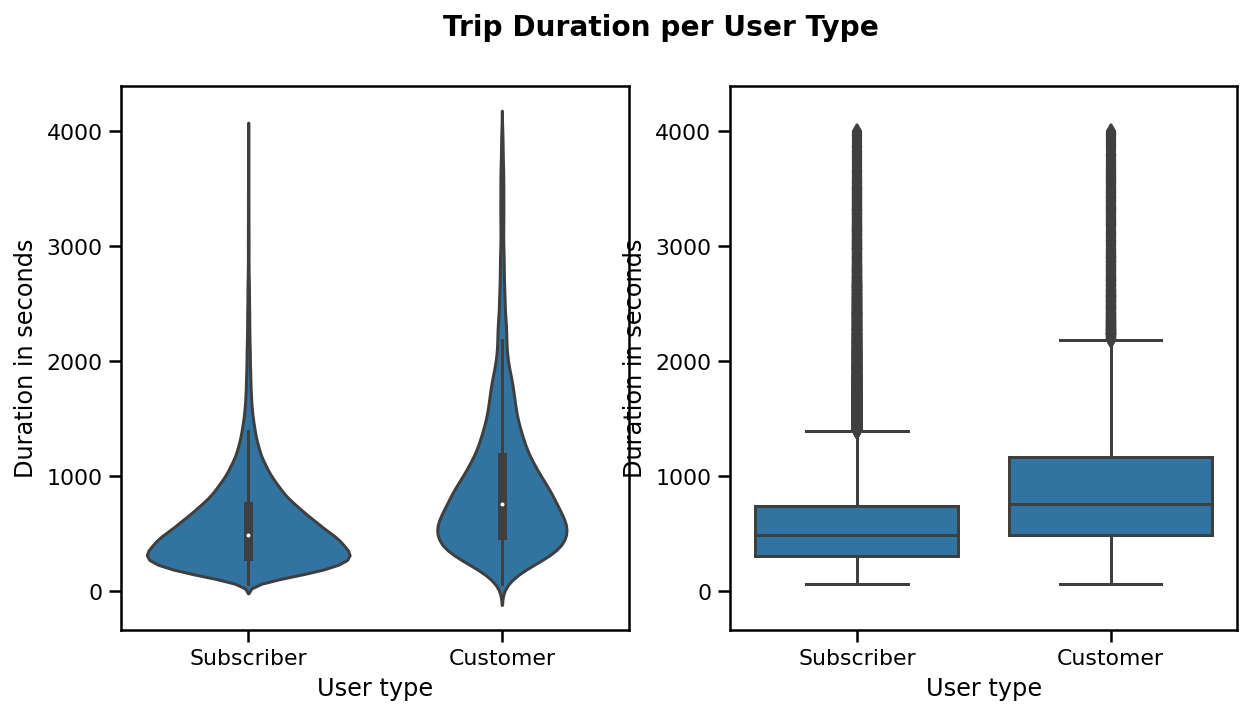

In [43]:
# Set an upper limit of 4000 to remove outliers for the graphs
fig = plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]
filter_data = df.query('duration_sec < 4000')

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = filter_data, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User type')
plt.ylabel('Duration in seconds')

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = filter_data, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User type')
plt.ylabel('Duration in seconds')
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
fig.suptitle('Trip Duration per User Type', fontsize=14, fontweight='bold')
plt.show();

In [44]:
# Average trip duration for different user types
# Set an upper limit of 6000 
print(df.query('duration_sec < 6000').groupby('user_type').duration_sec.mean())

user_type
Customer      998.977917
Subscriber    598.413340
Name: duration_sec, dtype: float64


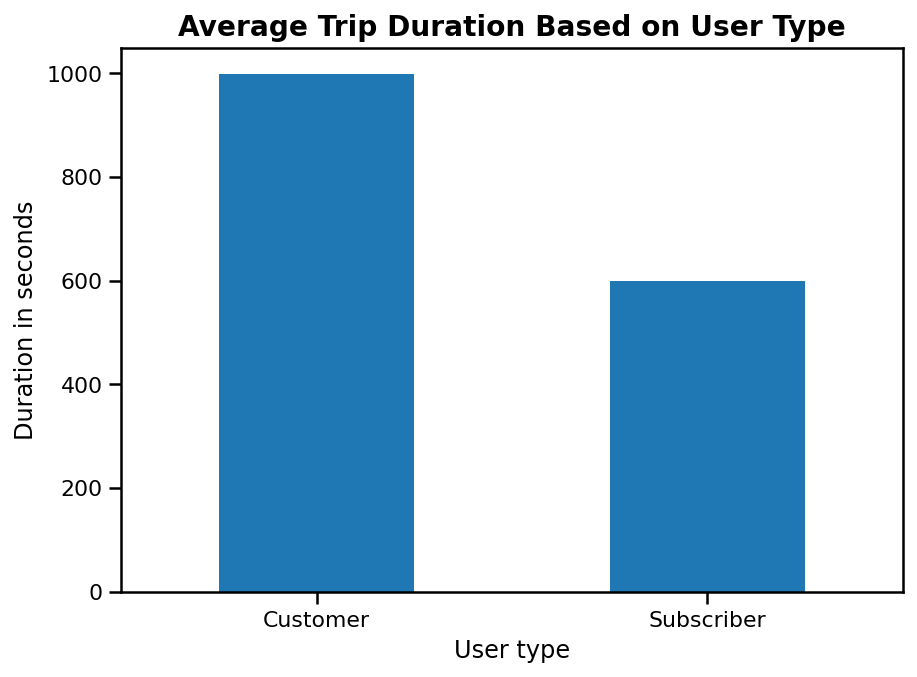

In [45]:
# Set an upper limit of 6000 
df.query('duration_sec < 6000').groupby('user_type')['duration_sec'].mean().plot(kind='bar', figsize=(7,5))
plt.title('Average Trip Duration Based on User Type', fontsize=14, fontweight='bold')
plt.xlabel('User type')
plt.ylabel('Duration in seconds')
plt.xticks(rotation=0);

Observations: We can see that although subscribers make a lot more trips than customers, customers generally take longer bike trip than subscribers.

We did a general look at how many rides were taken for different period of time in an earlier visual, now we'll look at the average durations of those rides per hour/day/month.

### 2. user_type vs. start_hour, start_dayofweek, start_month
To depict the relationship between two categorical variables, we can use clustered bar chart. I'll first check when are most trips taken in day.

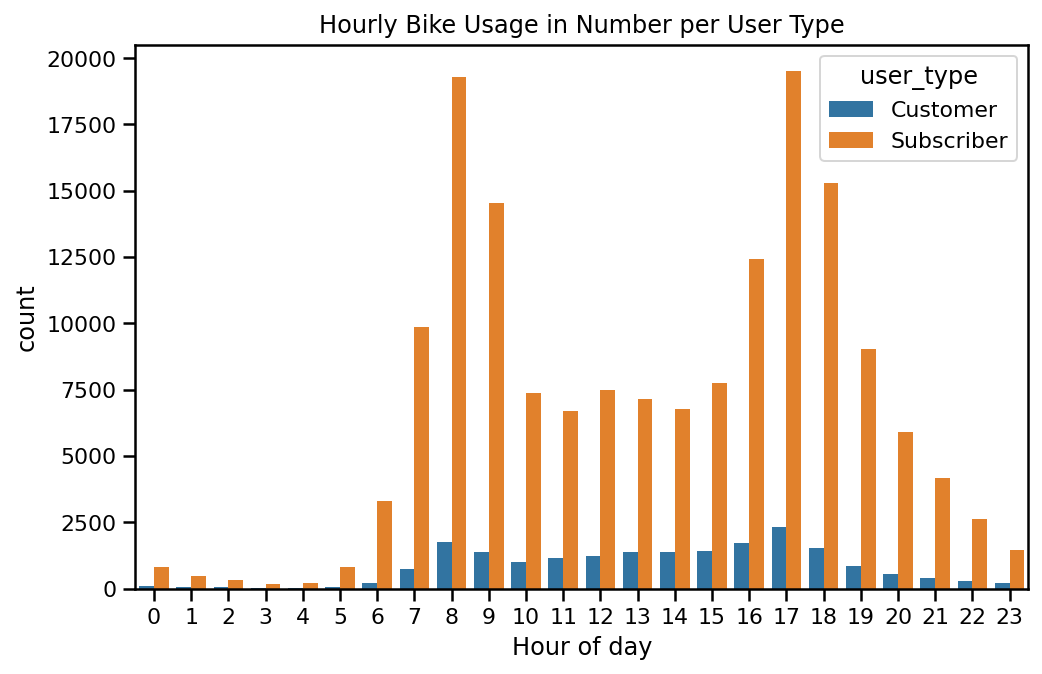

In [46]:
# Number of bike rides per hour per user type
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'start_hour', hue = 'user_type')
plt.xlabel('Hour of day')
plt.title('Hourly Bike Usage in Number per User Type');

Observations: The daily trend reveals that subscribers have substantial more bike rides than customers and both types look bimodal. But since the two types were plotted on the same scale, it's hard to interpret more about customers. Let's facet to plot the two groups again separately on different scale.

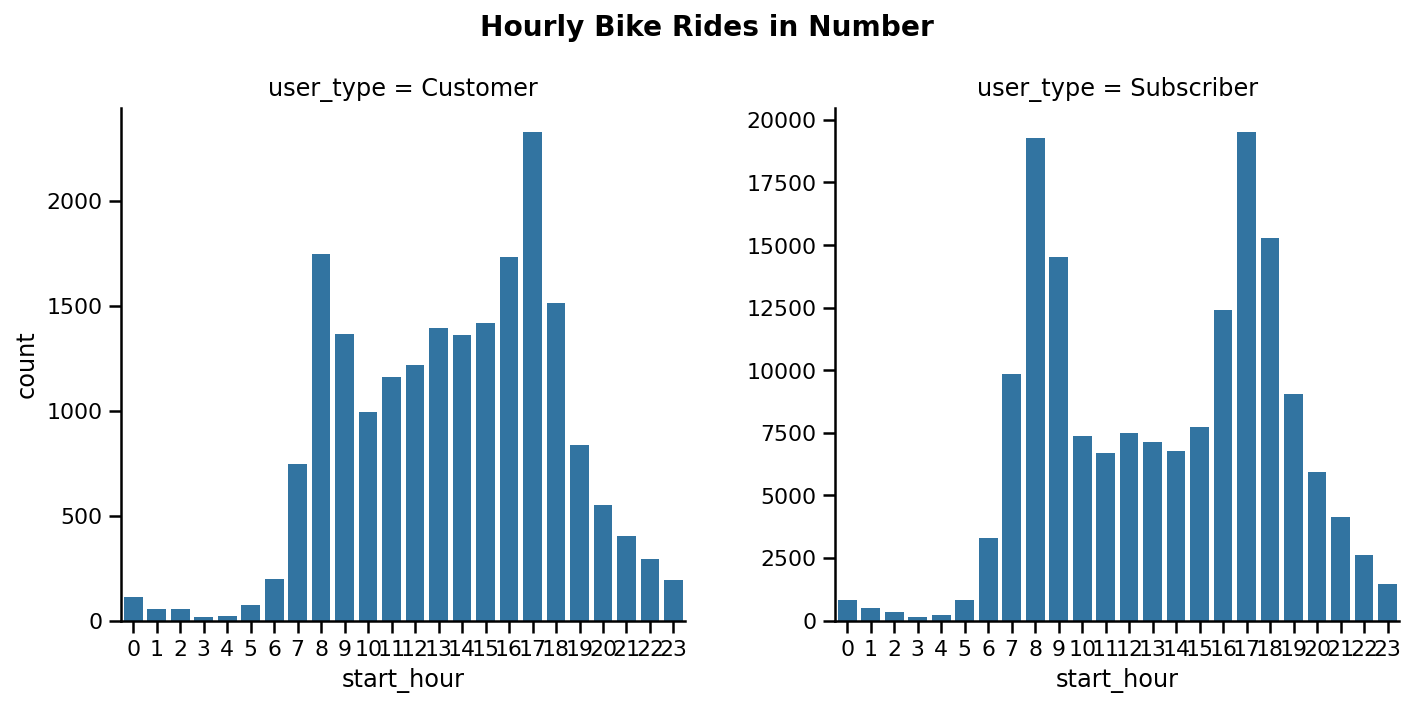

In [47]:
# Use Facet & catplot to plot subscribers and customers on different scale, https://seaborn.pydata.org/generated/seaborn.catplot.html
base_color = sns.color_palette()[0]
sns.catplot(data=df, x='start_hour', col='user_type', kind='count', color=base_color, sharey = False)
plt.subplots_adjust(top=0.85)
plt.suptitle('Hourly Bike Rides in Number', fontsize=14, fontweight='bold');

Observations: Now we can clearly see that subscribers take most of their trips around 7-9am and 4-6pm, typical commute hours to go to work/school and come back home after work/school. There are less bike rides during 10am-3pm. For customers, 8am-6pm is the popular time period to rent the bike. Bike usage for customers has one peak at 5pm and another peak at 8am, which is much less than the peak at 5pm. Customers are more likely to be tourist or occasional riders.




#### 3. What is the correlation between Distance(m) and speed(m/s)?

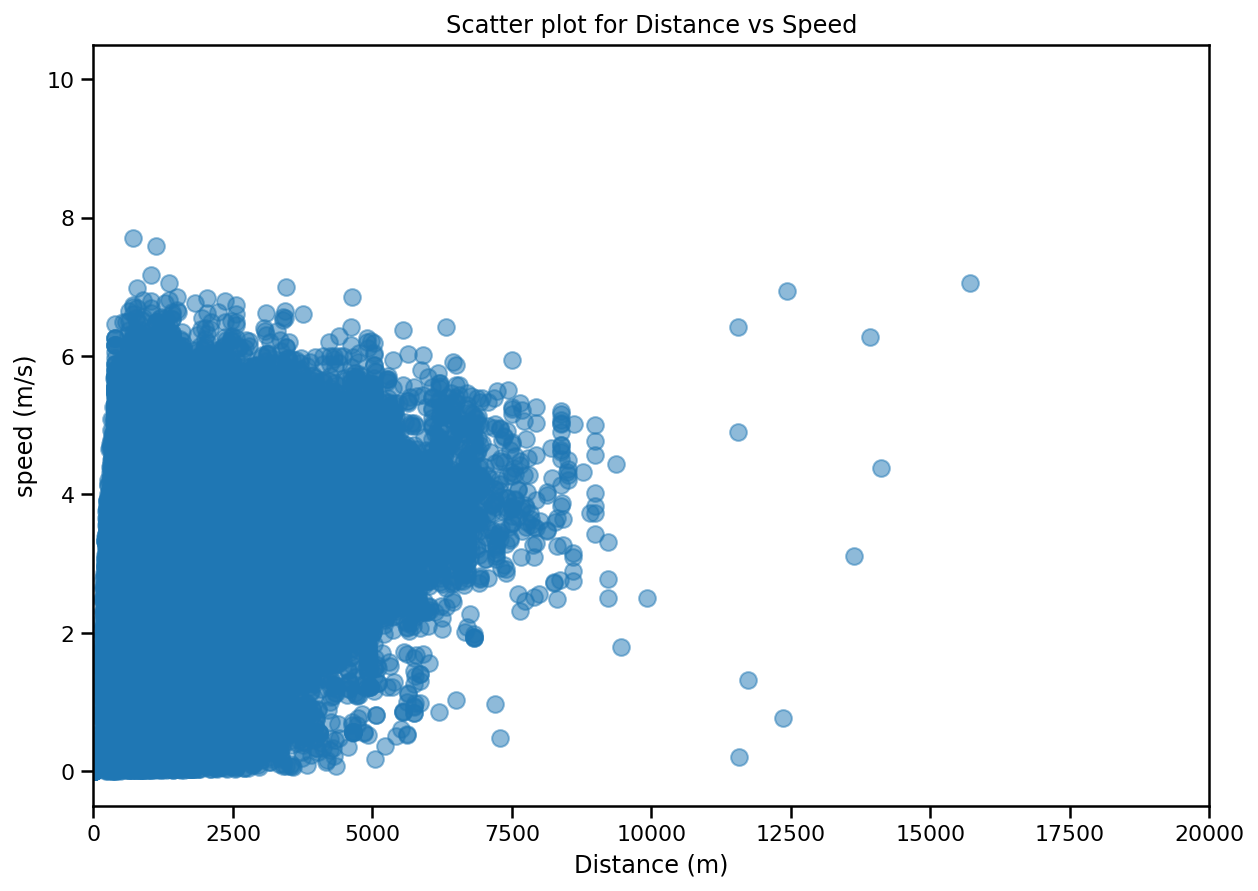

In [48]:
plt.figure(figsize=[10, 7])
x=df['dist']*1000
plt.xlim([0,20000])
plt.xlabel('Distance (m)')
plt.ylabel('speed (m/s)')
plt.title('Scatter plot for Distance vs Speed')
plt.scatter(data=df,x=x, y='speed',s=70, alpha=0.5);

### Observation
From the scatter plot, we can see a positive correlation between distance and speed with more correlation around speed from 0-7 m/s and distance from 0 to less than 10000m
#### 4. What is the relationship between user_type and member_gender?

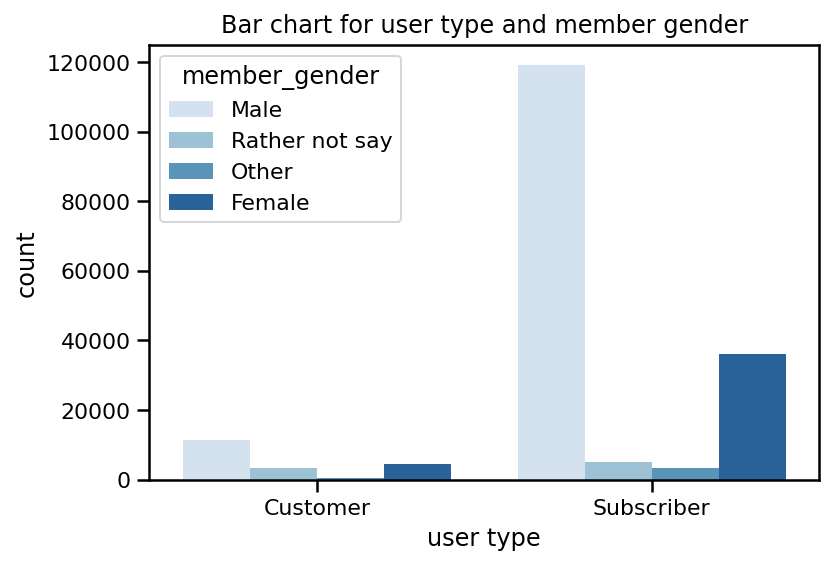

In [49]:
sns.countplot(data = df, x = 'user_type', hue = 'member_gender', palette = 'Blues')
plt.xlabel('user type')
plt.title('Bar chart for user type and member gender');

### Observation
the subscriber user type had more males and females than the customer user type.

#### 5. What is the relationship between user_type and bike_share_for_all_trip?

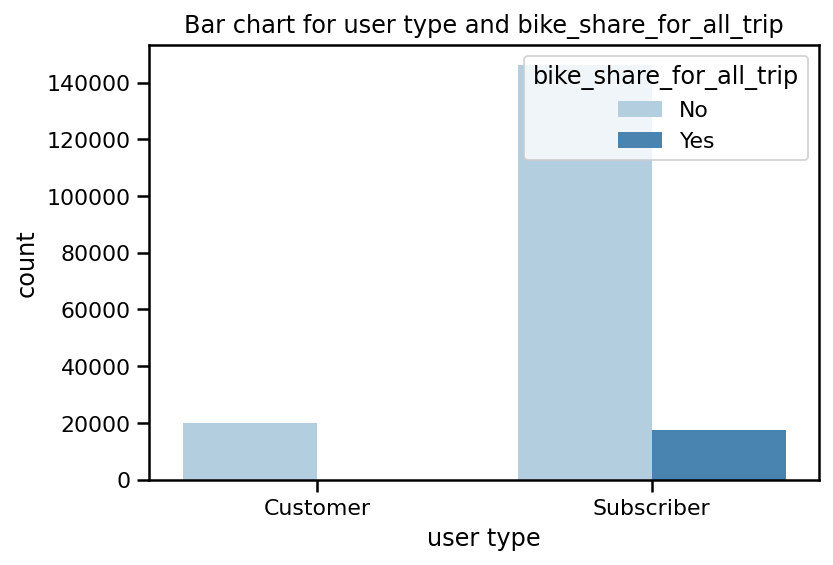

In [50]:
sns.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Blues')
plt.xlabel('user type')
plt.title('Bar chart for user type and bike_share_for_all_trip');

### Observation
The subscriber user type significantly didn't share their rides, while customers also didn't share their rides. The number of subscribers that shared their rides is almost the same as the number of customers that didn't share their rides.


#### 6. What is the correlation between member_birth_year(1950 to 1970) and user_type?

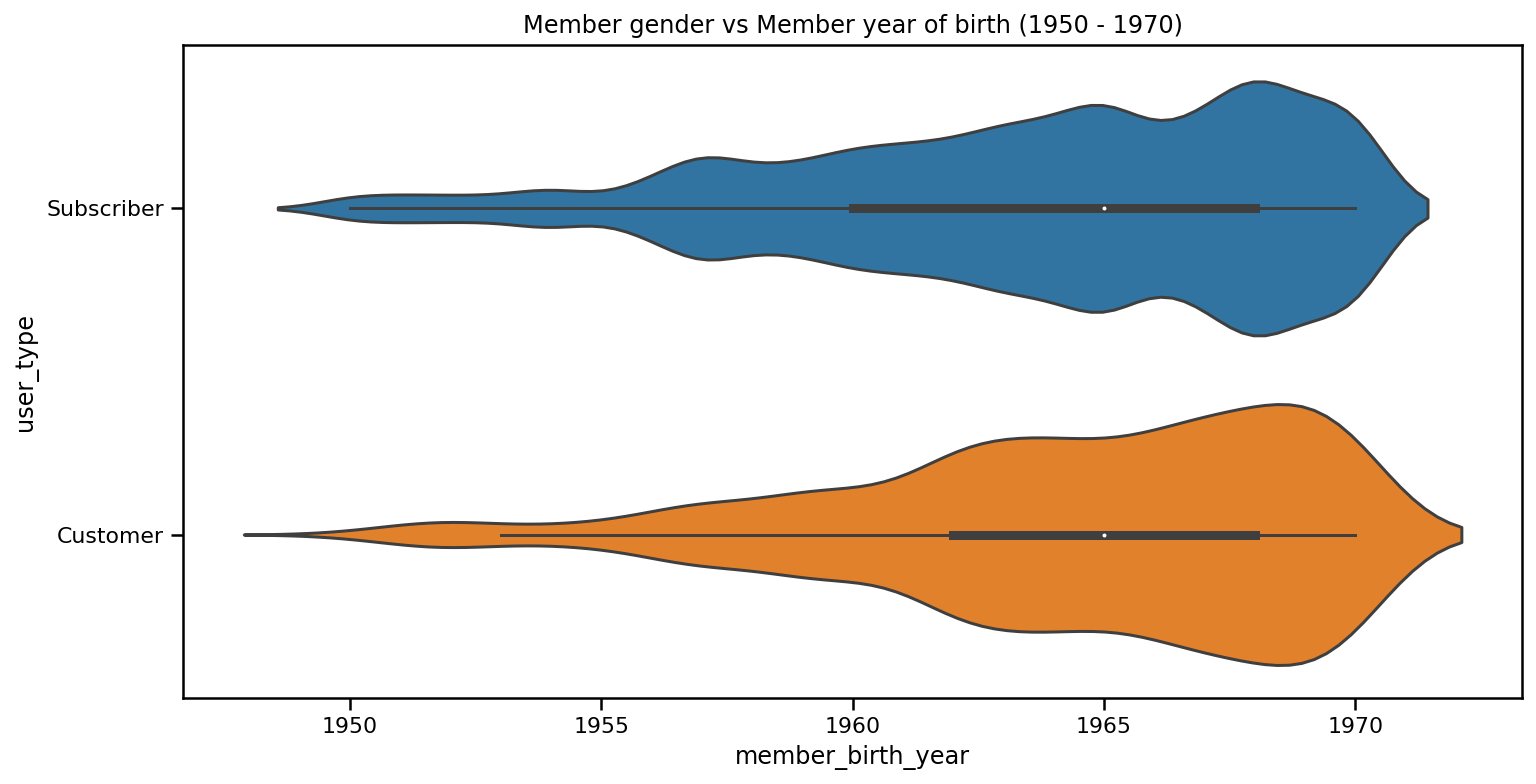

In [51]:

#lets reduce the member_year so we can have better visuals and insights
membirthdf=df[(df['member_birth_year']>=1950) & (df['member_birth_year']<= 1970)]
plt.figure(figsize=[12,6])
plt.title('Member gender vs Member year of birth (1950 - 1970)')
sns.violinplot(data=membirthdf, x='member_birth_year', y='user_type');

### Observation
years from 1950 to 1956 had more subscribers than customers, while year 1957 to 1958 had more customers than subscribers. From year 1961 to 1970 had more customers than subscribers or equal.

#### 7. What is the correlation between member_gender and bike_share_for_all_trip?

<AxesSubplot:xlabel='member_gender', ylabel='count'>

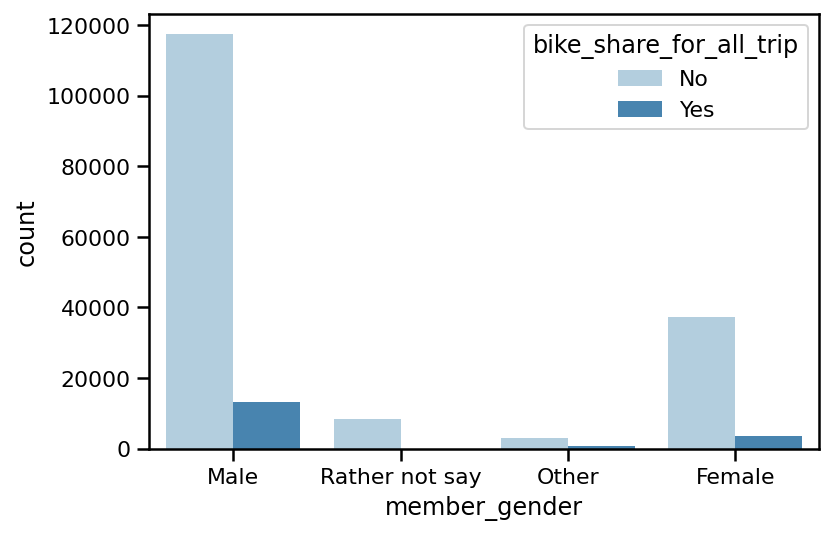

In [52]:
sns.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Blues')

### Observation
The distribution shows majority of male gender didn't share their trip with only a few shared. The Female gender shows majority didn't share while a few did.

#### 8. What is the correlation between end_station_name?

In [53]:
#we used pd.set_option to display all rows in value counts, so we can filter the first 10 end_station_name for our plot
pd.set_option("display.max_rows", None)
df['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St...    4857
Market St at 10th St                                 3973
Montgomery St BART Station (Market St at 2nd St)     3647
San Francisco Ferry Building (Harry Bridges Pl...    3368
Powell St BART Station (Market St at 4th St)         2997
San Francisco Caltrain (Townsend St at 4th St)       2947
Berry St at 4th St                                   2872
The Embarcadero at Sansome St                        2512
Powell St BART Station (Market St at 5th St)         2353
Steuart St at Market St                              2338
Howard St at Beale St                                2034
Civic Center/UN Plaza BART Station (Market St ...    1865
Bancroft Way at Telegraph Ave                        1814
Beale St at Harrison St                              1812
2nd St at Townsend St                                1741
3rd St at Townsend St                                1700
Embarcadero BART Station (Beale St at Market St)     1699
4th St at Miss

<AxesSubplot:xlabel='count', ylabel='end_station_name'>

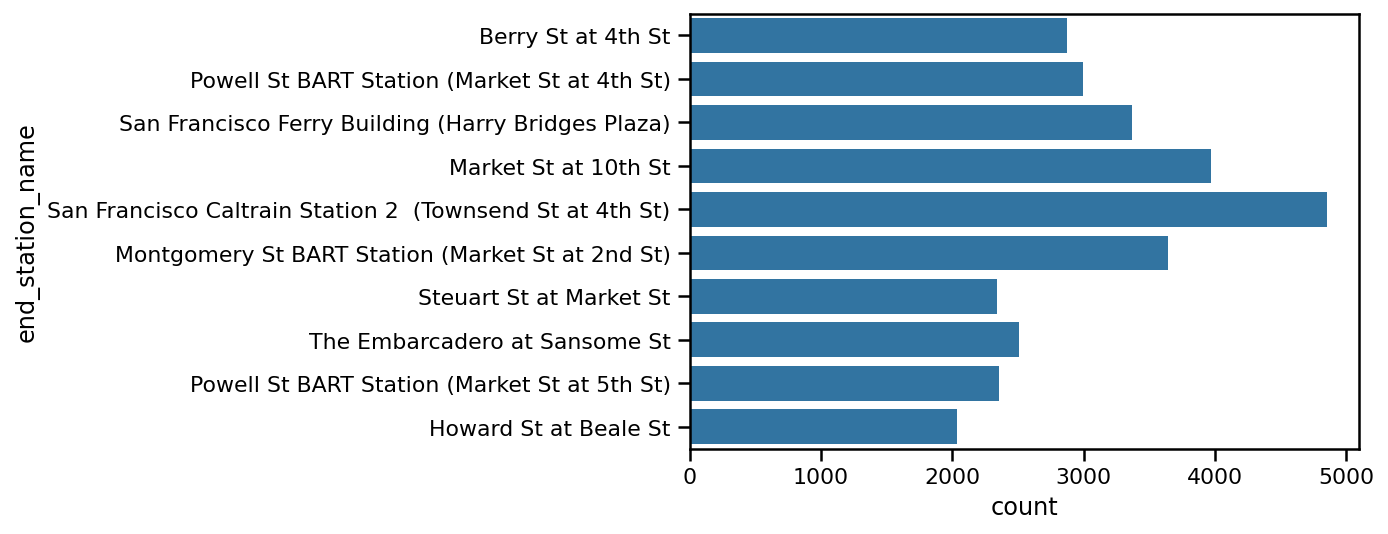

In [54]:
fbstartSname=df[df['end_station_name'].isin(['Powell St BART Station (Market St at 4th St)','San Francisco Ferry Building (Harry Bridges Plaza)','Montgomery St BART Station (Market St at 2nd St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Berry St at 4th St','The Embarcadero at Sansome St','Powell St BART Station (Market St at 5th St)','Steuart St at Market St','Howard St at Beale St'])]                    
sns.countplot(data=fbstartSname, y='end_station_name', color=color)

### Observation
Amongst the first 10 stations with most rides, San Francisco Caltrain Station 2 (Townsend St at 4th St) was first, then Market St at 10th St and so on as the visualization above clearly shows.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- From the scatter plot, we can see a positive correlation between distance and speed with more correlation around speed from 07 m/s and distance from 0 to less than 10000m
- The subscriber user type had more males and females than the customer user type.
- The distribution shows majority of male gender didn't share their trip with only a few shared. The Female gender shows majority didn't share while a few did.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- years from 1950 to 1956 had more subscribers than customers, while year 1957 to 1958 had more customers than subscribers. From year 1961 to 1970 had more customers than subscribers or equal.

### IV. Multivariate Exploration
The main thing I want to explore in this part of analysis is wheather bike trip durations and frequency depends on if a user is a subscriber or customer. Let's dive deeper to investigate the data by creating plots of multiple variables. Let's first look at average bike ride duration for different usertype.

In [55]:
df.corr()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,dist,start_month,start_dayofweek,start_hour,speed
duration_sec,1.000000,-0.008652,0.010961,-0.038537,0.003064,0.011322,-0.039524,-0.006115,-0.056249,0.126922,NaN,0.033669,0.006638,-0.245614
start_station_id,-0.008652,1.000000,-0.190978,0.459169,0.336227,-0.179771,0.466755,-0.064677,0.019639,-0.056973,NaN,0.051037,0.012272,-0.010590
start_station_latitude,0.010961,-0.190978,1.000000,-0.672735,-0.179727,0.989825,-0.678205,0.049669,-0.020175,0.066849,NaN,-0.008429,-0.017069,0.073408
start_station_longitude,-0.038537,0.459169,-0.672735,1.000000,0.479688,-0.677376,0.992314,-0.142066,0.056089,-0.154334,NaN,0.012805,0.053455,-0.029044
end_station_id,0.003064,0.336227,-0.179727,0.479688,1.000000,-0.197992,0.469027,-0.054607,0.017298,-0.076684,NaN,0.051874,0.090772,-0.058006
end_station_latitude,0.011322,-0.179771,0.989825,-0.677376,-0.197992,1.000000,-0.679774,0.048912,-0.020660,0.069875,NaN,-0.008084,-0.034043,0.075705
end_station_longitude,-0.039524,0.466755,-0.678205,0.992314,0.469027,-0.679774,1.000000,-0.143826,0.056721,-0.147256,NaN,0.012333,0.033712,-0.020874
bike_id,-0.006115,-0.064677,0.049669,-0.142066,-0.054607,0.048912,-0.143826,1.000000,0.026727,0.099563,NaN,0.034486,0.016501,0.144176
member_birth_year,-0.056249,0.019639,-0.020175,0.056089,0.017298,-0.020660,0.056721,0.026727,1.000000,-0.005953,NaN,-0.030514,-0.000490,0.067696
dist,0.126922,-0.056973,0.066849,-0.154334,-0.076684,0.069875,-0.147256,0.099563,-0.005953,1.000000,NaN,-0.015536,-0.068673,0.313308


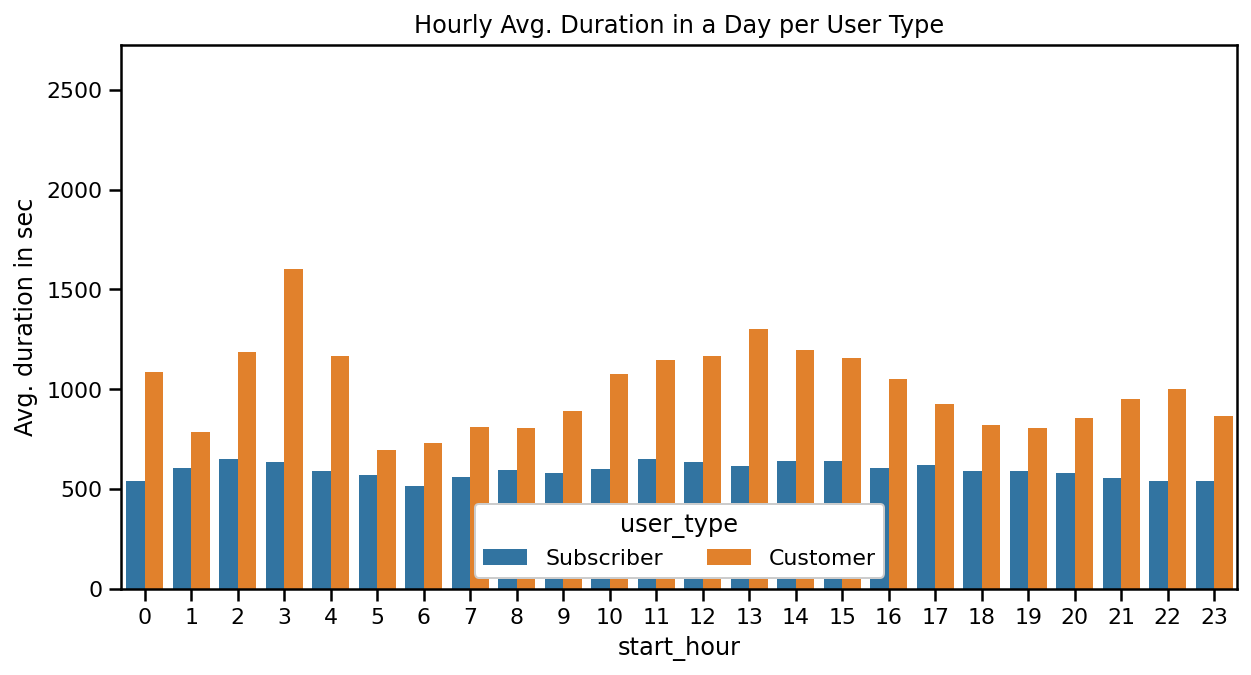

In [56]:
# Two categorical variables and one numeric variable: clustered bar chart using the barplot function 
# use "hue" parameter to add a categorical third variable 
plt.figure(figsize = (10, 5))
ax = sns.barplot(data = df.query('duration_sec < 6000'), x = 'start_hour', y = 'duration_sec', hue = 'user_type', errwidth = 0)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
plt.ylabel('Avg. duration in sec')
plt.title('Hourly Avg. Duration in a Day per User Type');


Observations: Hourly avg. duration for customers are longer than subscribers. The graph above demonstrates similar pattern for both subscribers and customers. But average duration for customers are higher between 10am-5pm reaching its peak at 2pm.

#### What is the distribution of duration acorss distance and speed?

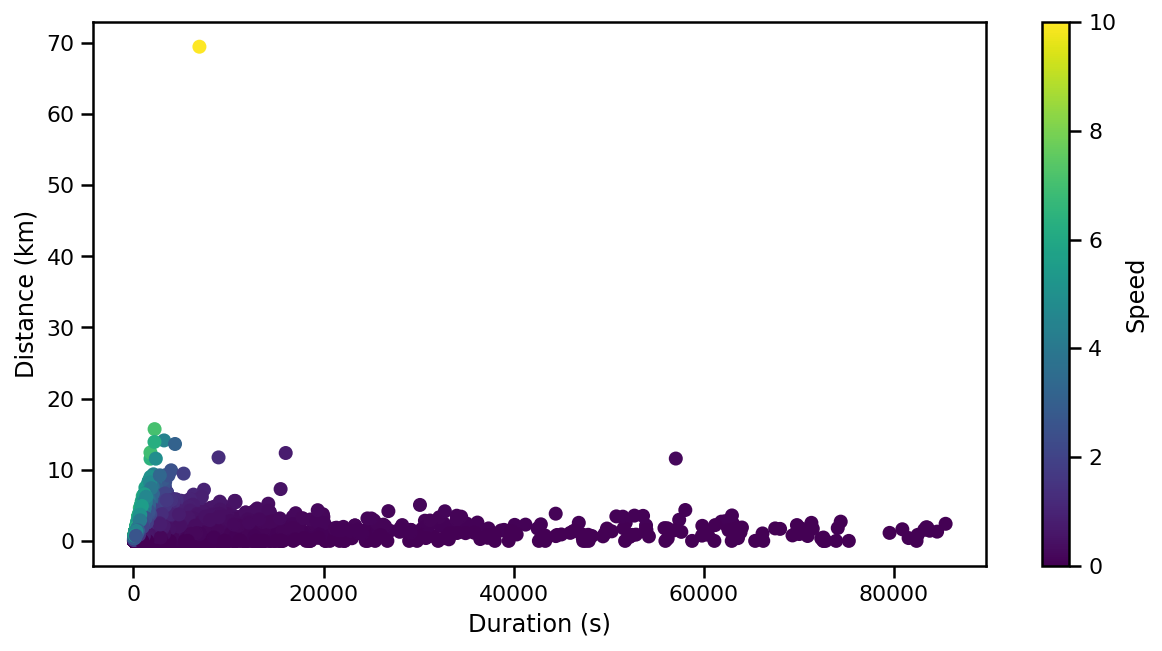

In [57]:
#to turn it to multivatiant. Third column must be categorical
#set speed categorical
plt.figure(figsize=[10,5])
x=df['dist']*1000
plt.scatter(data=df, x='duration_sec' ,y='dist', c='speed')
plt.xlabel('Duration (s)')
plt.ylabel('Distance (km)')
plt.colorbar(label='Speed');

### Observation
- As distance increaes with increae in duration sec,so does the speed of a ride increase.
#### what is the distribution of duration acorss distance and user type?

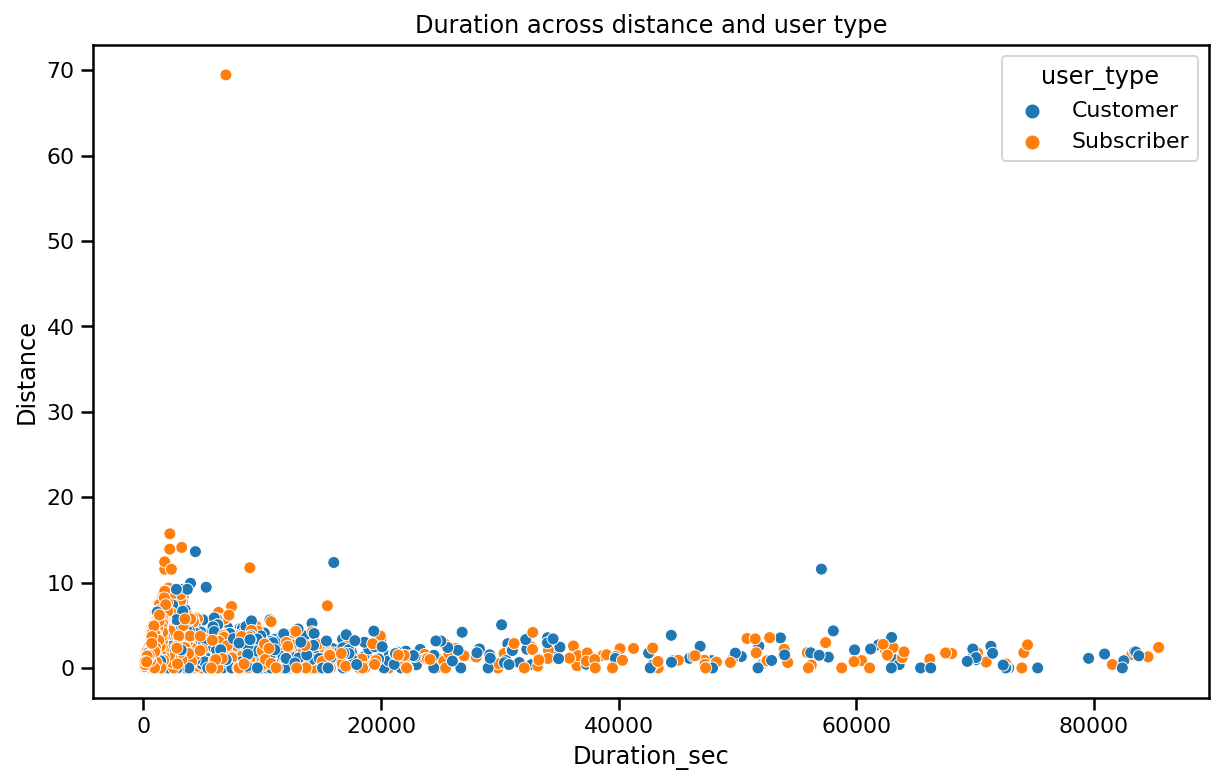

In [58]:

plt.figure(figsize=[10,6])
plt.xlabel('Duration_sec')
plt.ylabel('Distance')
plt.title('Duration across distance and user type')
sns.scatterplot(data=df, x='duration_sec',y='dist', hue='user_type');

### Observation
The scatter plot shows most are subscribers as compared to customers, it also indicates increase in distance to cause increase in duration.
#### what is relationship of end station name acorss distance and user type?

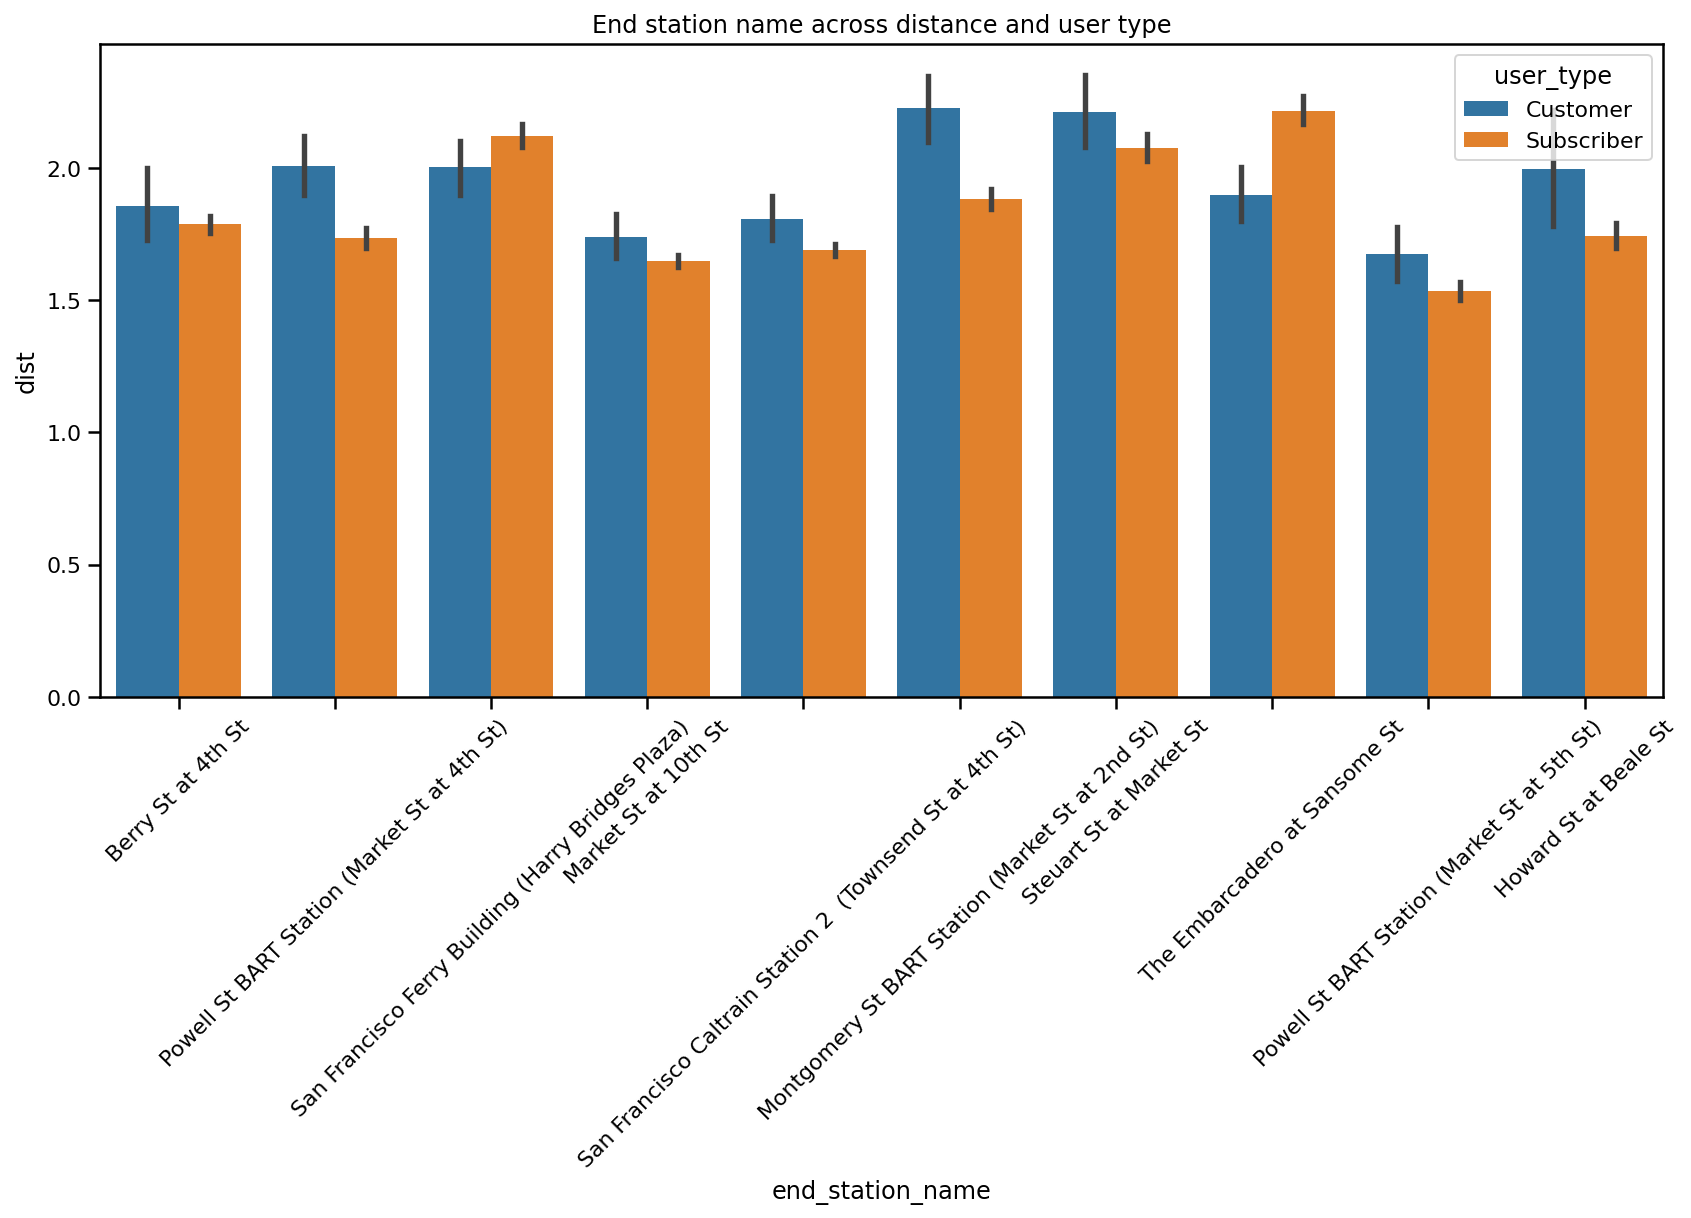

In [59]:
#end_station multivariate

plt.figure(figsize=[14, 6])
plt.xlabel('end station name')
plt.ylabel('Distance')
plt.title('End station name across distance and user type')
sns.barplot(data=fbstartSname, x='end_station_name', y='dist',  hue='user_type')
plt.xticks(rotation=45);

### Observation
San Francisco Caltrain Station 2 (Townsend St at 4th St) had more rides in total with customers having more rides than subscirbers
#### what is the distribution of member birth year acorss distance and member gender?

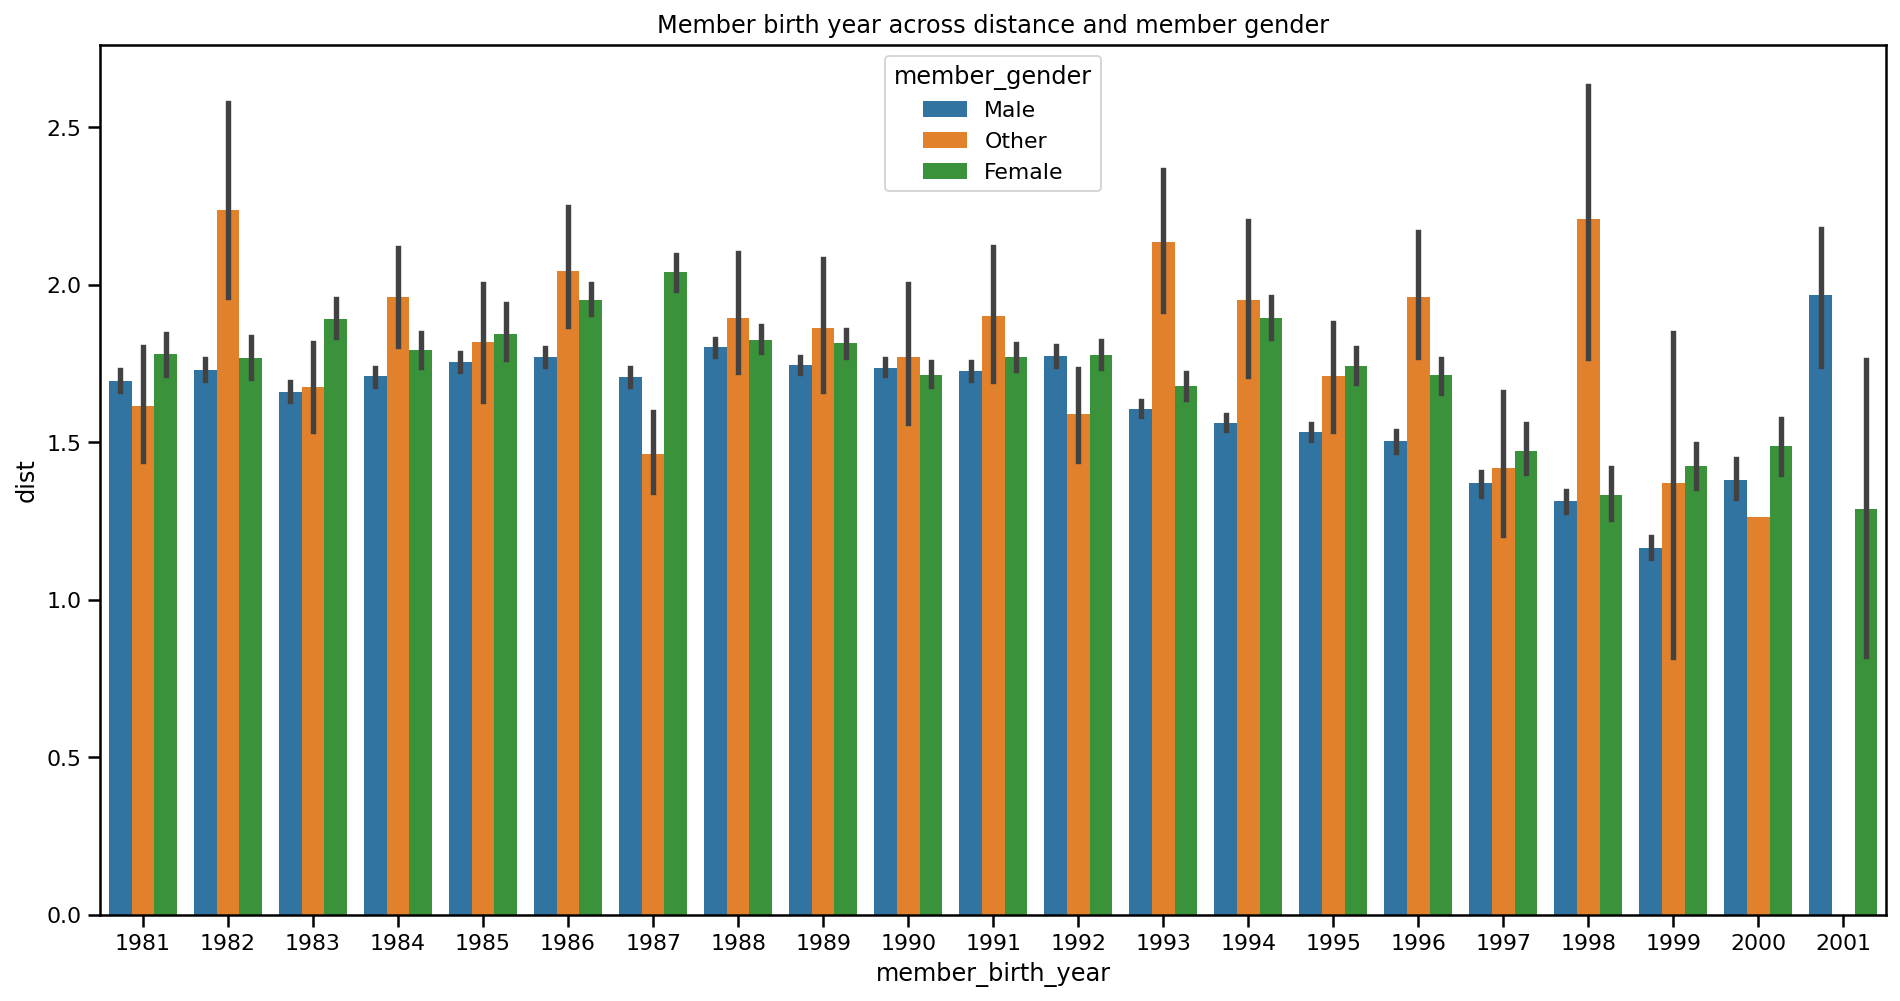

In [60]:
#lets reduce the member_year so we can have better visuals and insights
membirthdf=df[df['member_birth_year']>1980]
plt.figure(figsize=[16,8])
plt.title('Member birth year across distance and member gender')
sns.barplot(data=membirthdf, x='member_birth_year', y='dist',  hue='member_gender');

### Observation
year 2001 had only males and females as gender, with males convering a longer distance than females.1998 other had covered more distance about 2.3km. with males and females covering the same distance.
#### what is the distribution of member birth year acorss distance and user type

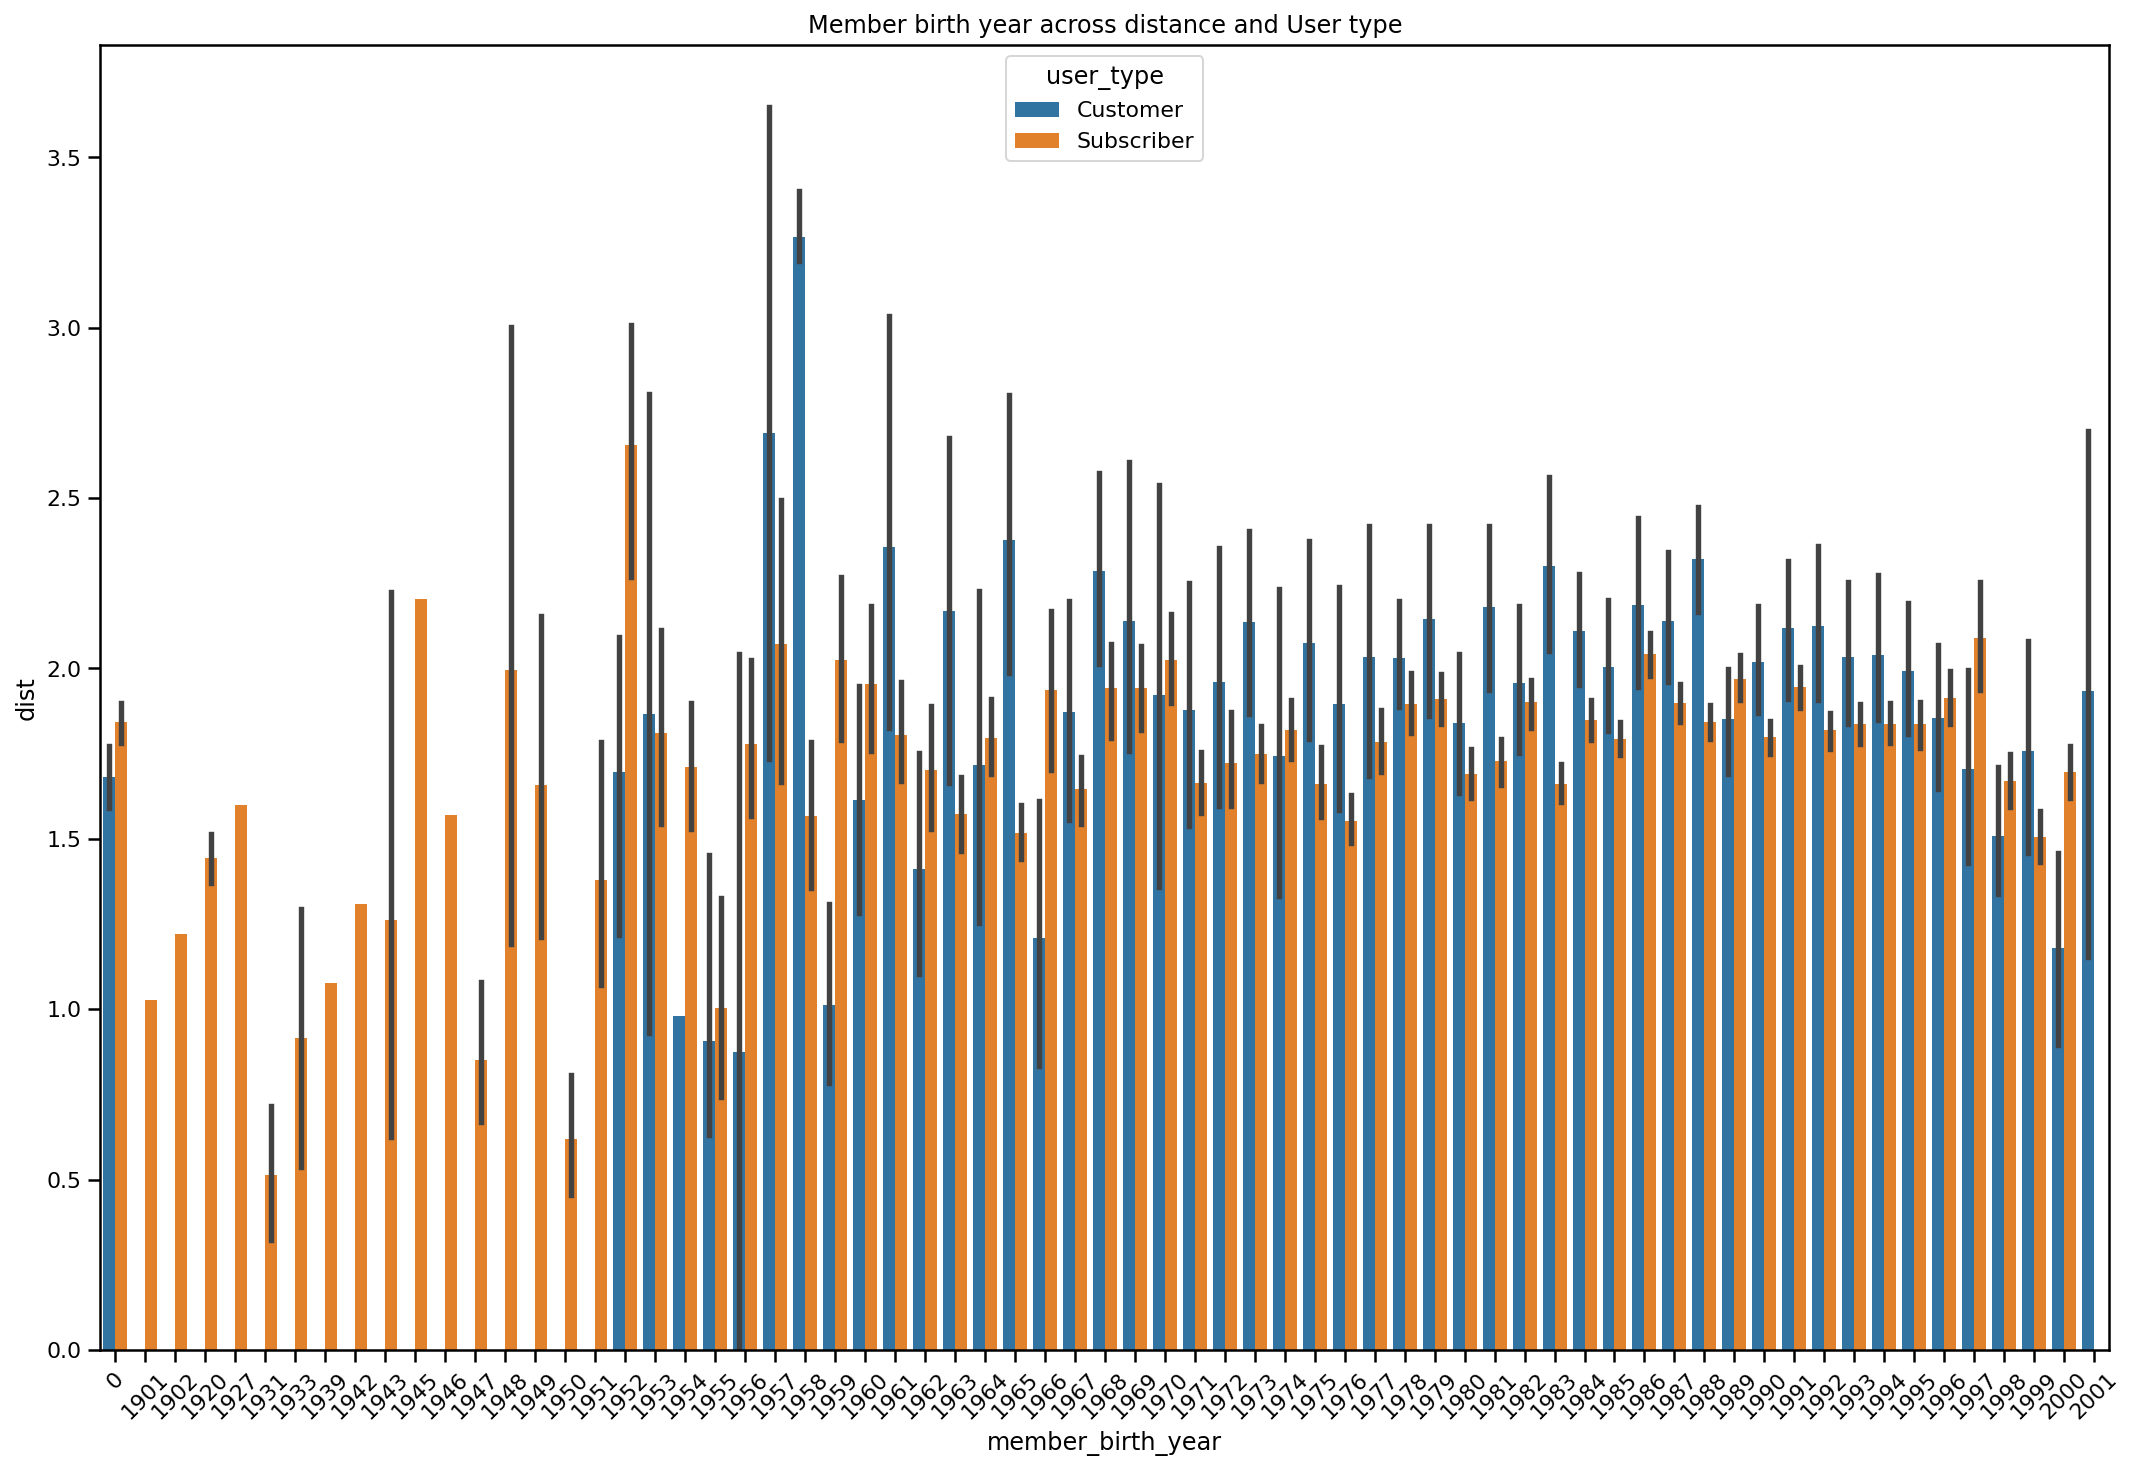

In [61]:
#member birth year multivariate
plt.figure(figsize=[18,12])
plt.title('Member birth year across distance and User type')
sns.barplot(data=fbstartSname, x='member_birth_year', y='dist',  hue='user_type')
plt.xticks(rotation=45);


### Observation
we have so many data points on this plot, so we need to have an upper and lower limit to see more clearly.
#### what is the relationship between member birth year across distance and user type?

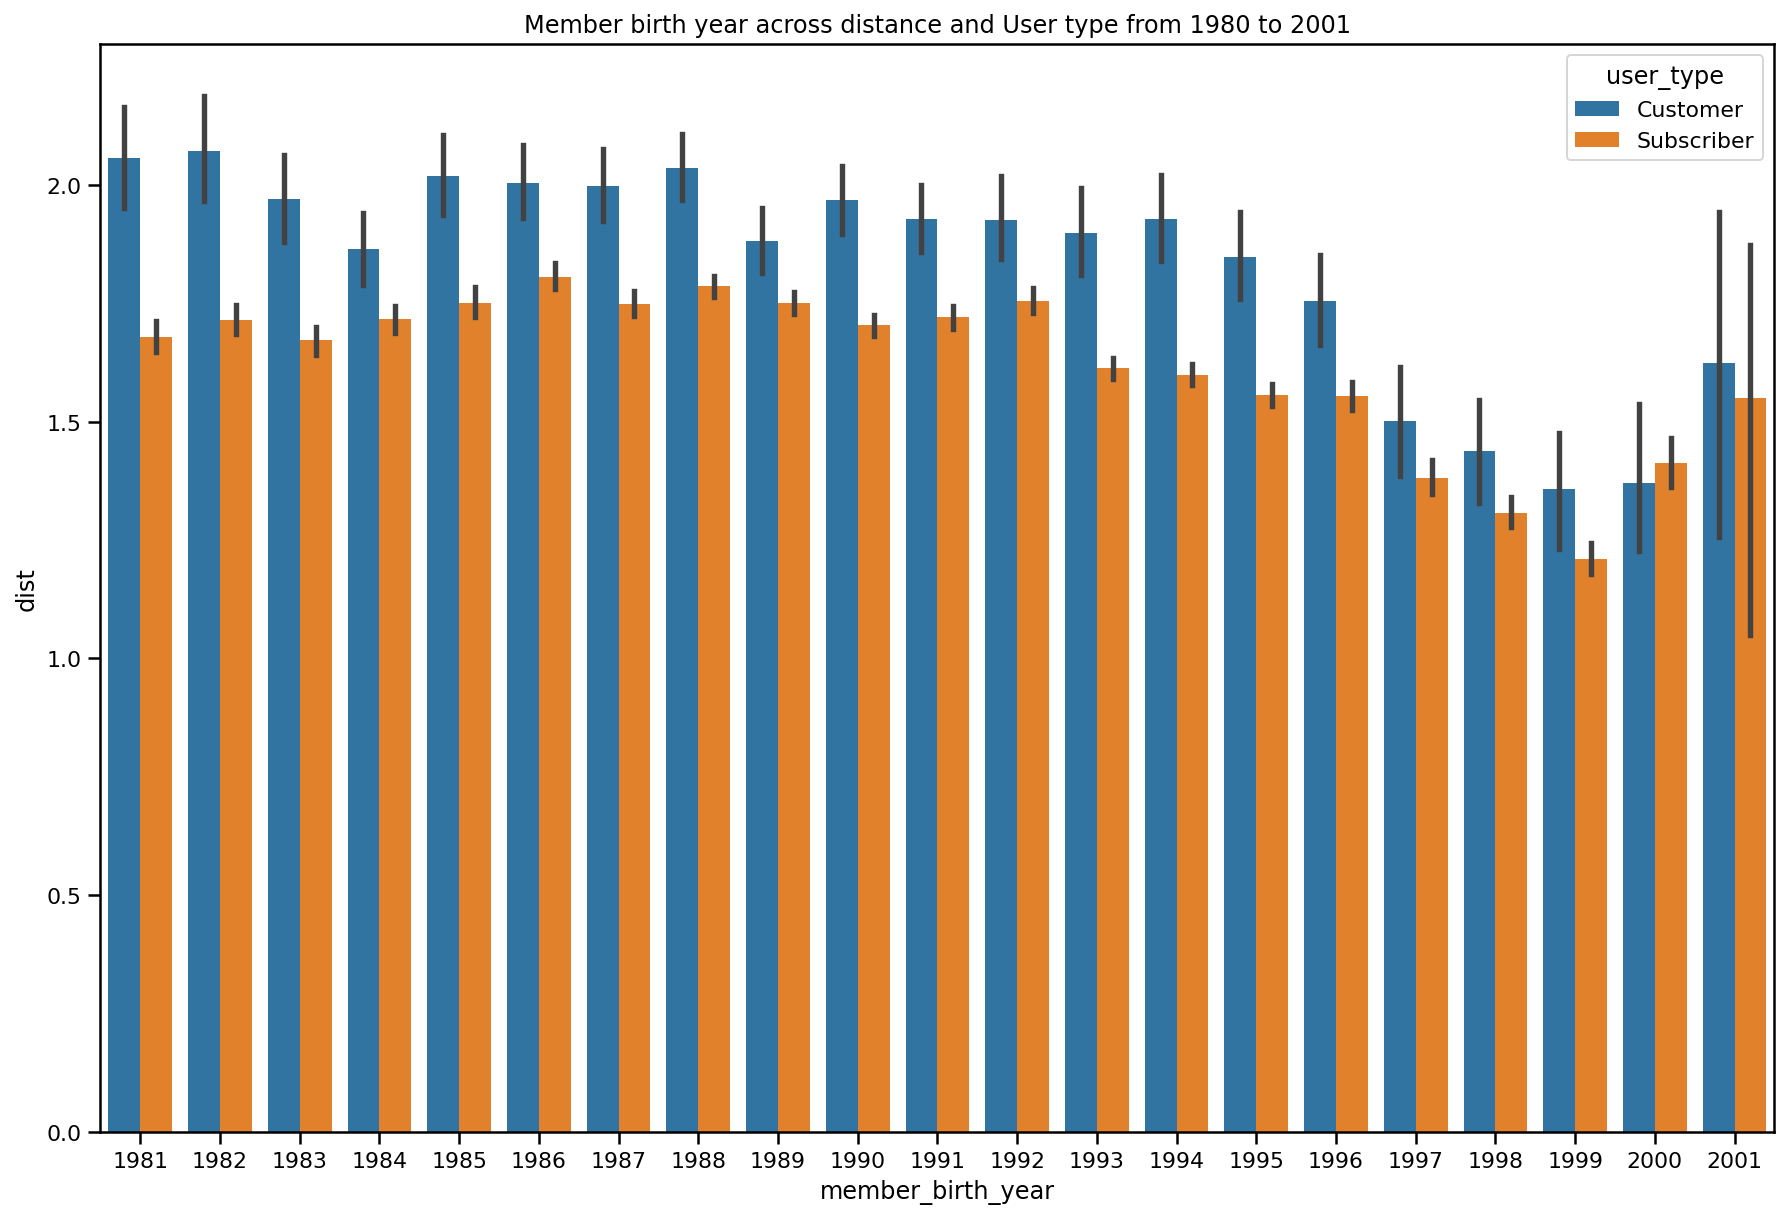

In [62]:
#lets reduce the member_year so we can have better visuals and insights
membirthdf=df[df['member_birth_year']>1980]
plt.figure(figsize=[15,10])
plt.title('Member birth year across distance and User type from 1980 to 2001')
sns.barplot(data=membirthdf, x='member_birth_year', y='dist',  hue='user_type');

### Observation
Narrowing down on the years say 1981 to 20001 gives a clearer view of our data.

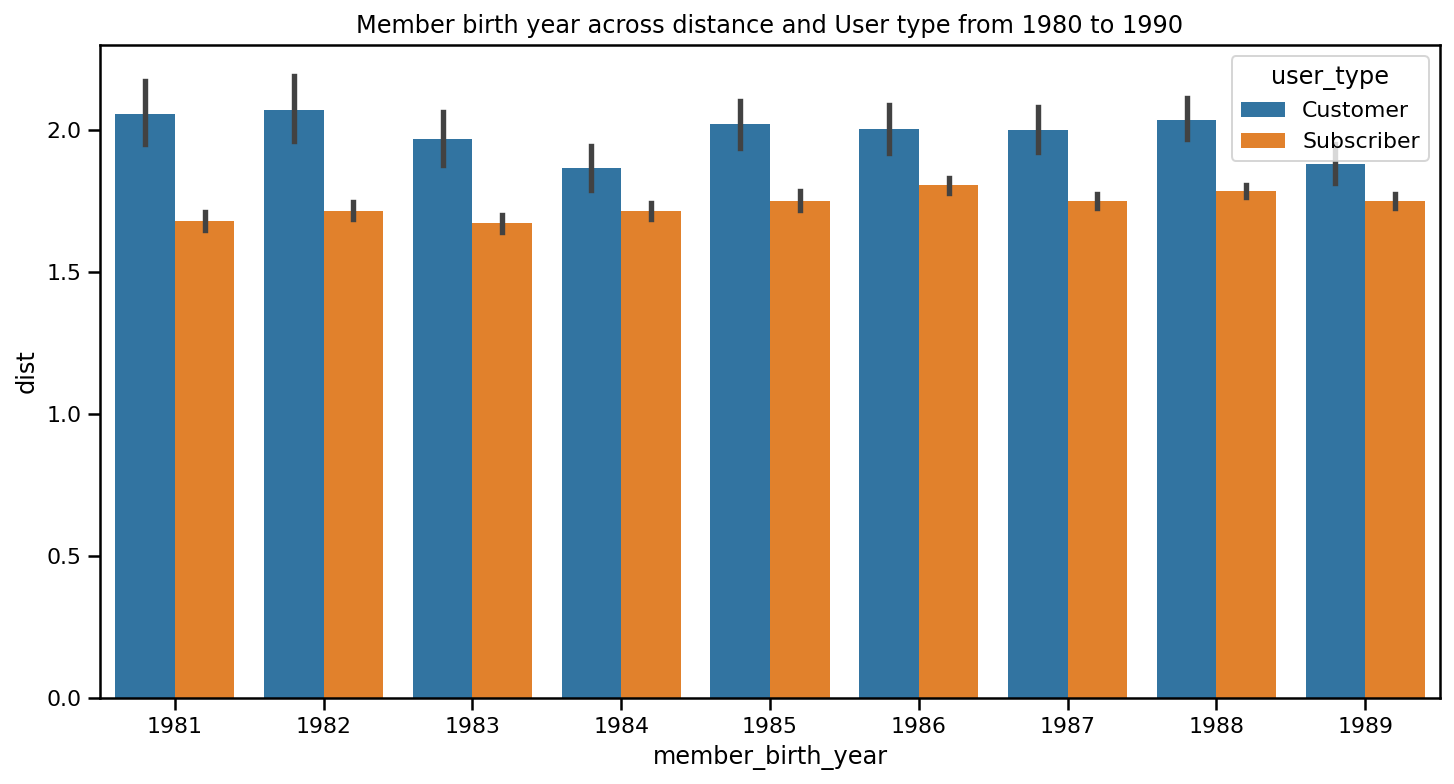

In [63]:
#lets reduce the member_year so we can have better visuals and insights
membirthdf=df[(df['member_birth_year']>1980) & (df['member_birth_year']< 1990)]
plt.figure(figsize=[12,6])
plt.title('Member birth year across distance and User type from 1980 to 1990')
sns.barplot(data=membirthdf, x='member_birth_year', y='dist',  hue='user_type');

### Observation
1981 to 1989 shows customers had covered more distance than subscribers between that period.

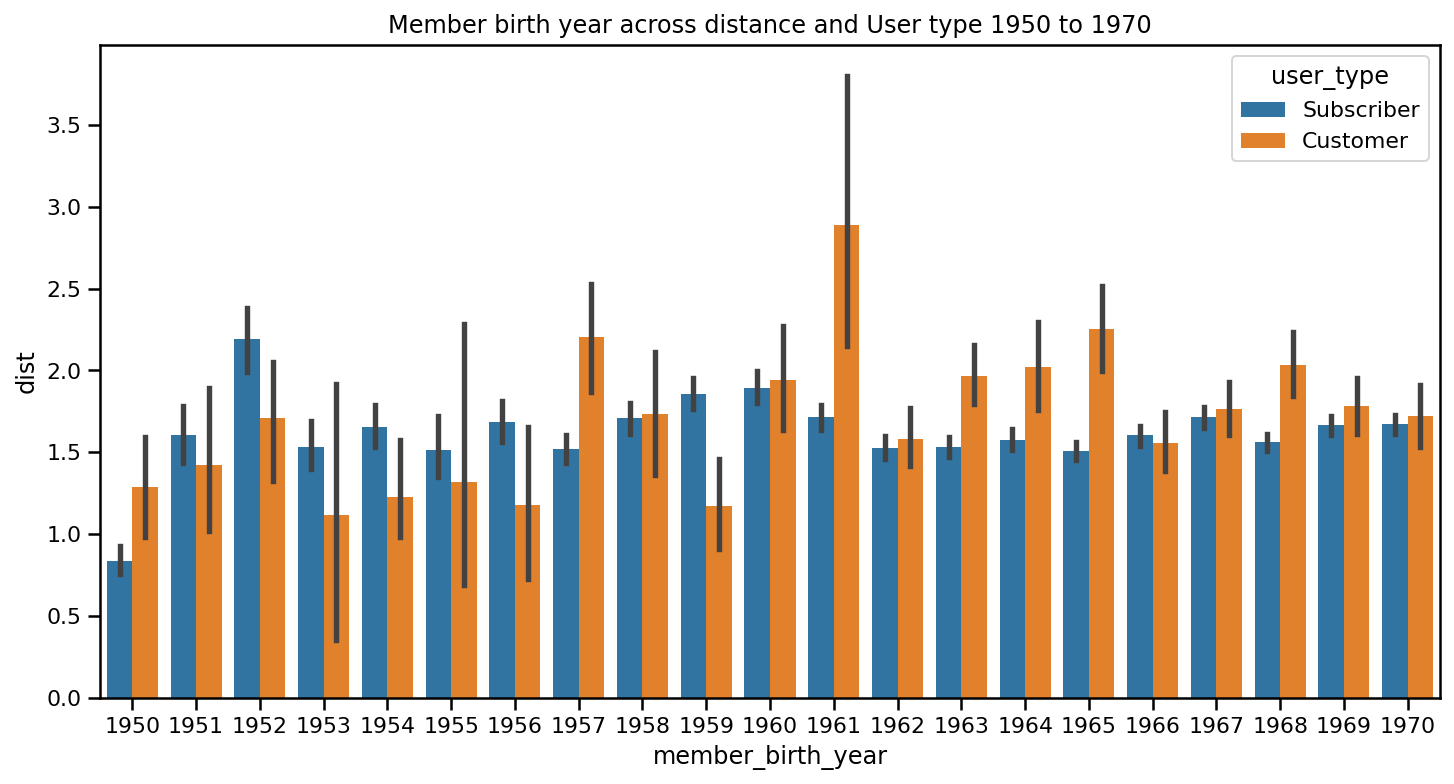

In [64]:
#lets reduce the member_year so we can have better visuals and insights
membirthdf=df[(df['member_birth_year']>=1950) & (df['member_birth_year']<= 1970)]
plt.figure(figsize=[12,6])
plt.title('Member birth year across distance and User type 1950 to 1970')
sns.barplot(data=membirthdf, x='member_birth_year', y='dist',  hue='user_type');

### Observation
- Birth year from 1950 to 1956 shows subscribers to have convered more distance and the trend had a switch form 1957 to 1970 where customers to have convered higher distance.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- The multivariate plots have lead to nice observations, some of which are:
- Speed was an interesting feature obtained from ditance/(duration). It strenghtened the usage of comparing speed of a ride and features like member birth year, user type and bike_share_for_all_trip.
- Birth year from 1950 to 1956 shows subscribers to have convered more distance and the trend had a switch form 1957 to 1970 where customers to have convered higher distance. ### Were there any interesting or surprising interactions between features?

- Quite honestly, the converted variables i.e latitiude and longitude to obtain distance brought about richness of the data. The variable duration_sec was converted to minutes and also to day(mon,tue,wed... sunday) and it gave better insight in terms of week day.

### Conclusions
You can write a summary of the main findings and reflect on the steps taken during the data exploration.

- In summary, the findings shows the richness of the data when i combined my previous knowledge of the last project on data wrangling with this on visualization. combining data warngling (even though some are not commented or put on a markdown) and exploration using visualization made the work more rich. I used the question, visualization and observation format for each exploration. Conversion of some of the variables like latitiude and longitude to obtain distance and duration_sec to obtain minutes and importantly to days of the week(mon,tue,wed... sunday) assisted in my exploration. Having an upper and lower Limit on member birth year due to much data gave a better visualizationa and understanding of the data. Tools like xlimit for the x-axis on some variabes made our data visualization clearer as we truncated outliers. The list below list our findings: ###
- Thursdays have more rides while weekends have less rides.
- subscribers take on far more rides than customers
- more males take on rides than females with a large difference
- Most users to large extent did not share their bikes as only just a few did. no customer shared his/her ride.
- trip distance is usually between 5 to 7 minutes
- San Francisco Caltrain Station 2 (Townsend St at 4th St) station had more rides than any station and customers had more rides than subscribers.

### References:
Udacity Data Analyst Nanodegree 5.Data Visualization course materials & Example_Project_Diamonds\
https://thispointer.com/python-how-to-unzip-a-file-extract-single-multiple-or-all-files-from-a-zip-archive/
https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/
https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/
https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
https://stackoverflow.com/questions/53548973/remove-background-plot-lines-in-pyplot-hist
https://seaborn.pydata.org/generated/seaborn.catplot.html
https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
https://stackoverflow.com/questions/35193808/re-order-pandas-series-on-weekday
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby